# CS6200 - Data Mining Techniques Project (Fall 2019)

## CRIME DATASET ANALYSIS AND PREDICTION

<b><i>Prajakta Rodrigues, Samarth Parikh, Sangeetha Chandrashekar, Tej Bhavsar</i></b>

### 1. Data Understand and Data Pre-processing

In [1]:
# Import all the necessary libraries to perform data mining tasks using the scikit 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
import seaborn as sns
import scipy as sp
import gc

In [2]:
# Load the chicago crime dataset
fileURL = "Crimes_-_2001_to_present.csv"
chicago_crimes = pd.read_csv(fileURL,error_bad_lines=False)

C:\Users\praja\Documents\softwares\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Understanding the number of rows and columns in the chicago crime dataset
chicago_crimes.shape

(7008908, 22)

In [4]:
# From info() method, we can see the data types (dtypes) of each column 
chicago_crimes.info()
#We see that the dataset is huge and more than 1GB in size. For our analysis, we might not need all the columns and rows,
# so we will try and reduce the size for better focus on the parts that are necessary for analysis

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7008908 entries, 0 to 7008907
Data columns (total 22 columns):
ID                      int64
Case Number             object
Date                    object
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
Beat                    int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                object
X Coordinate            float64
Y Coordinate            float64
Year                    int64
Updated On              object
Latitude                float64
Longitude               float64
Location                object
dtypes: bool(2), float64(7), int64(3), object(10)
memory usage: 1.1+ GB


In [5]:
# Display first five rows of the dataset to better understand the layout
chicago_crimes.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11034701,JA366925,01/01/2001 11:00:00 AM,016XX E 86TH PL,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,8.0,45.0,11,NaN,NaN,2001,08/05/2017 03:50:08 PM,NaN,NaN,NaN
1,11227287,JB147188,10/08/2017 03:00:00 AM,092XX S RACINE AVE,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,RESIDENCE,False,False,...,21.0,73.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
2,11227583,JB147595,03/28/2017 02:00:00 PM,026XX W 79TH ST,0620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,18.0,70.0,05,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
3,11227293,JB147230,09/09/2017 08:17:00 PM,060XX S EBERHART AVE,0810,THEFT,OVER $500,RESIDENCE,False,False,...,20.0,42.0,06,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN
4,11227634,JB147599,08/26/2017 10:00:00 AM,001XX W RANDOLPH ST,0281,CRIM SEXUAL ASSAULT,NON-AGGRAVATED,HOTEL/MOTEL,False,False,...,42.0,32.0,02,NaN,NaN,2017,02/11/2018 03:57:41 PM,NaN,NaN,NaN


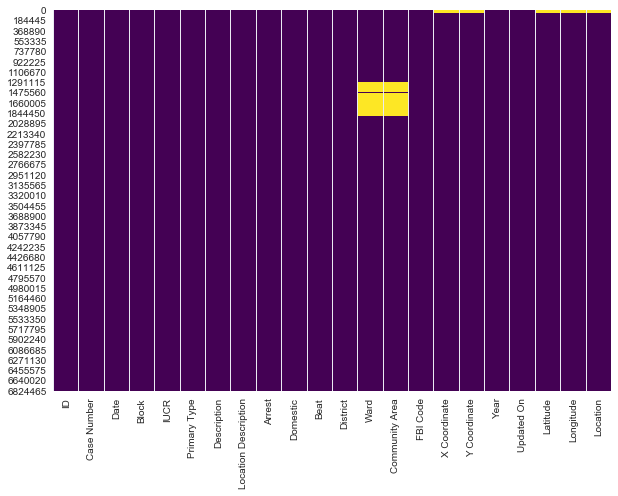

In [6]:
# Let us plot a heatmap to see where the null values are and visually see the number of rows that have missing data.
plt.figure(figsize=(10,7))
sns.heatmap(chicago_crimes.isnull(), cbar = False, cmap = 'viridis')

In [7]:
# Statistical data of the number of missing values
print("chicago_crimes dataset: missing values check")
chicago_crimes= chicago_crimes.replace('?', np.NaN)
chicago_crimes.isnull().sum()

chicago_crimes dataset: missing values check


ID                           0
Case Number                  4
Date                         0
Block                        0
IUCR                         0
Primary Type                 0
Description                  0
Location Description      5835
Arrest                       0
Domestic                     0
Beat                         0
District                    47
Ward                    614826
Community Area          613495
FBI Code                     0
X Coordinate             66897
Y Coordinate             66897
Year                         0
Updated On                   0
Latitude                 66897
Longitude                66897
Location                 66897
dtype: int64

In [8]:
# Since the number of null values is small in comparision to the whole dataset, we will drop the rows with null values
chicago_crimes = chicago_crimes.iloc[1:]
chicago_crimes = chicago_crimes.dropna()

In [9]:
#For our data analysis, we will be only concentrating on crimes after the year 2005. After research we found that crimes below 2005 are not well documented
chicago_crimes['Year'] = chicago_crimes['Year'].astype(int)
chicago = chicago_crimes[chicago_crimes['Year'] >= 2005]

In [10]:
# The update dataset descriptions will be as follows
chicago.shape

(5043385, 22)

In [11]:
chicago.describe()

,ID,Beat,District,Ward,Community Area,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,5.043385e+06,5.043385e+06,5.043385e+06,5.043385e+06,5.043385e+06,5.043385e+06,5.043385e+06,5.043385e+06,5.043385e+06,5.043385e+06
mean,7.886543e+06,1.179495e+03,1.127486e+01,2.276127e+01,3.761933e+01,1.164542e+06,1.885491e+06,2.011049e+03,4.184138e+01,-8.767172e+01
std,2.370685e+06,7.010996e+02,6.935921e+00,1.380975e+01,2.154141e+01,1.713120e+04,3.260723e+04,4.253852e+00,8.972239e-02,6.203134e-02
min,3.012000e+03,1.110000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.005000e+03,3.661945e+01,-9.168657e+01
25%,5.871269e+06,6.210000e+02,6.000000e+00,1.000000e+01,2.300000e+01,1.152858e+06,1.858775e+06,2.007000e+03,4.176788e+01,-8.771413e+01
50%,7.899175e+06,1.033000e+03,1.000000e+01,2.200000e+01,3.200000e+01,1.166068e+06,1.890586e+06,2.011000e+03,4.185539e+01,-8.766594e+01
75%,9.932724e+06,1.724000e+03,1.700000e+01,3.400000e+01,5.800000e+01,1.176365e+06,1.908999e+06,2.015000e+03,4.190613e+01,-8.762820e+01
max,1.189015e+07,2.535000e+03,3.100000e+01,5.000000e+01,7.700000e+01,1.205119e+06,1.951573e+06,2.019000e+03,4.202271e+01,-8.752453e+01


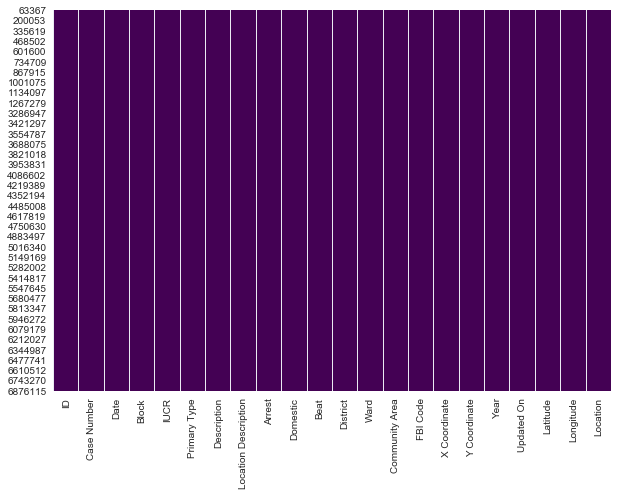

In [12]:
# Heatmap to visualize any missing values
plt.figure(figsize=(10,7))
sns.heatmap(chicago.isnull(), cbar = False, cmap = 'viridis')

In [13]:
# If there are any duplicate values, the below code will make sure to delete that and keep the first copy
chicago =chicago.drop_duplicates(subset='Case Number', keep='first', inplace=False)

In [14]:
#Now let us remove the columns that we definetly know we do not need for any of the further analysis since they do not give any insight to the crimes
#Removing columns 'Case Number','Beat', 'FBI code', 'Updated On', 'X Coordinate', 'Y - Coordinate',
chicago.drop(['Case Number','Updated On', 'FBI Code', 'Beat','Location','X Coordinate', 'Y Coordinate'], inplace=True, axis=1)

In [15]:
chicago.head()

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Latitude,Longitude
63367,11665567,04/10/2019 04:37:00 PM,102XX S VERNON AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,"SCHOOL, PUBLIC, BUILDING",False,False,5.0,9.0,49.0,2019,41.708589,-87.612583
63451,11667968,04/19/2019 01:57:00 PM,002XX N LARAMIE AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,15.0,28.0,25.0,2019,41.884865,-87.755230
63452,11667963,04/12/2019 04:08:00 PM,032XX N KEELER AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,17.0,30.0,16.0,2019,41.940298,-87.732066
63528,11668309,04/25/2019 05:20:00 PM,108XX S DR MARTIN LUTHER KING JR DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,5.0,9.0,49.0,2019,41.697609,-87.613508
63935,11692179,05/13/2019 05:26:00 PM,090XX S RACINE AVE,0560,ASSAULT,SIMPLE,STREET,False,False,22.0,21.0,73.0,2019,41.729973,-87.653167


In [16]:
#Convert Date column to Date Time format
chicago['Date']= pd.to_datetime(chicago['Date'], format='%m/%d/%Y %H:%M:%S %p' , errors='coerce')

In [17]:
#We have now reduced the size to manageable size and we can proceed with the rest of the data analysis
chicago.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043049 entries, 63367 to 7008905
Data columns (total 15 columns):
ID                      int64
Date                    datetime64[ns]
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
District                float64
Ward                    float64
Community Area          float64
Year                    int32
Latitude                float64
Longitude               float64
dtypes: bool(2), datetime64[ns](1), float64(5), int32(1), int64(1), object(5)
memory usage: 529.0+ MB


### 2. Initial Data Analysis

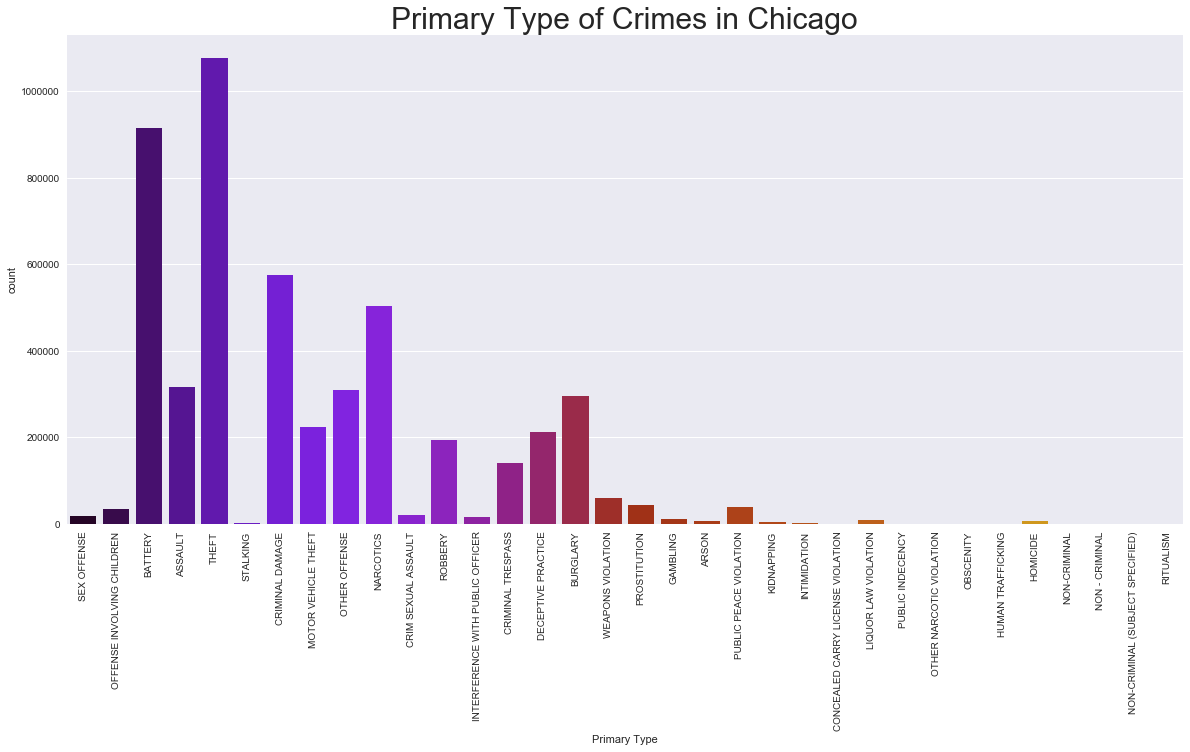

In [18]:
# Crimes according to primary crime type
plt.rcParams['figure.figsize'] = (20, 9)
sns.countplot(chicago['Primary Type'], palette = 'gnuplot')
plt.title('Primary Type of Crimes in Chicago', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

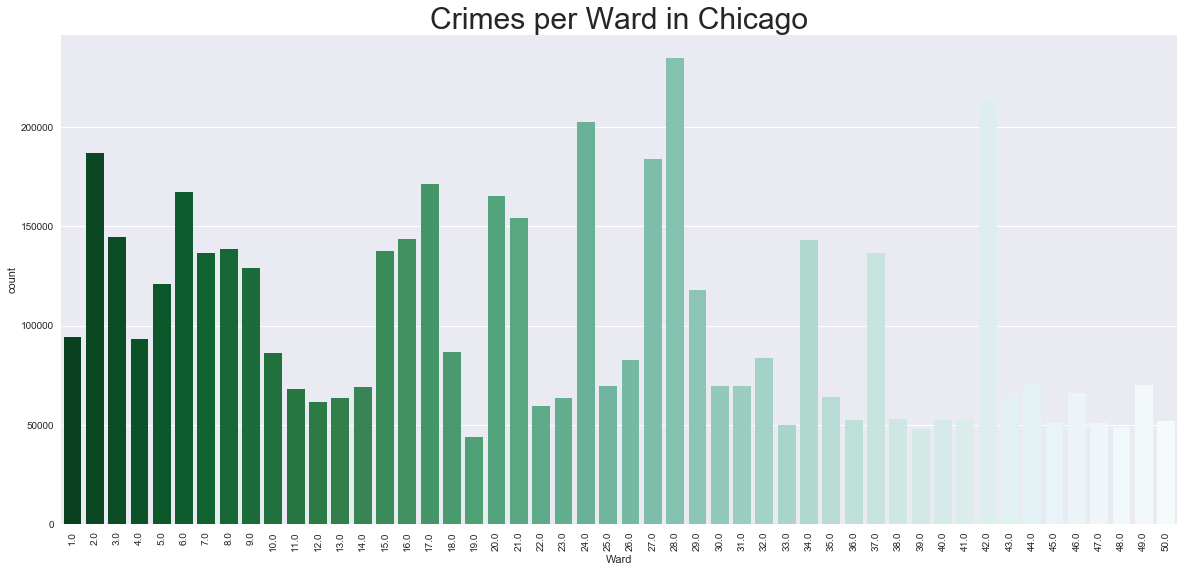

In [19]:
# Wards with count of respective crimes
plt.rcParams['figure.figsize'] = (20, 9)
sns.countplot(chicago['Ward'], palette = 'BuGn_r')
plt.title('Crimes per Ward in Chicago', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

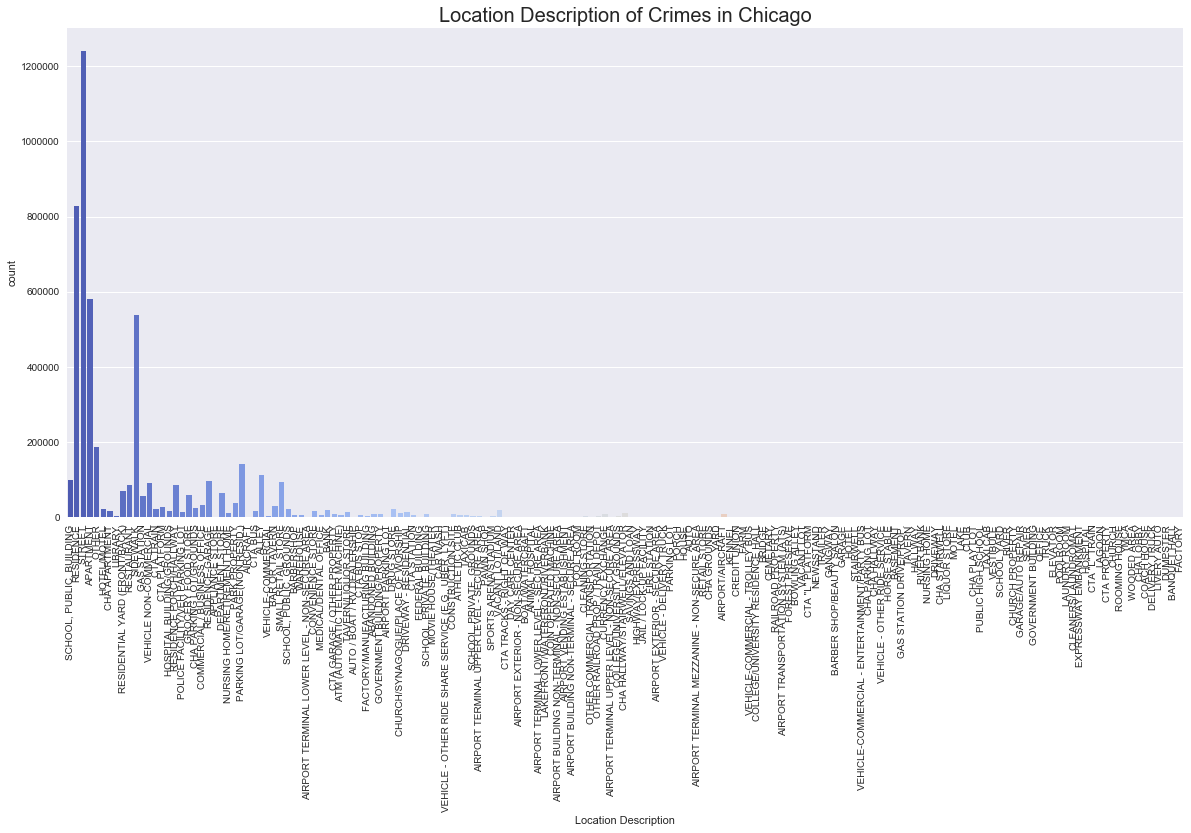

In [20]:
# Location description with count of respective crimes
plt.rcParams['figure.figsize'] = (20, 9)
sns.countplot(chicago['Location Description'], palette = 'coolwarm')
plt.title('Location Description of Crimes in Chicago', fontsize = 20)
plt.xticks(rotation = 90)
plt.show()

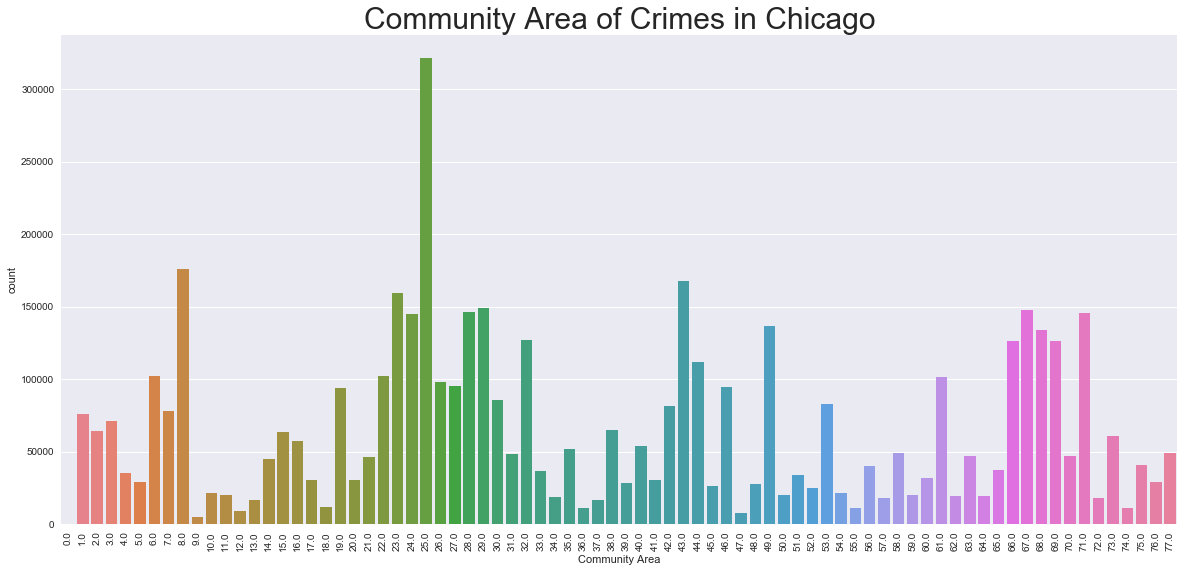

In [21]:
# Community Area with count of respective crimes
plt.rcParams['figure.figsize'] = (20, 9)
sns.countplot(chicago['Community Area'], palette = 'husl')
plt.title('Community Area of Crimes in Chicago', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

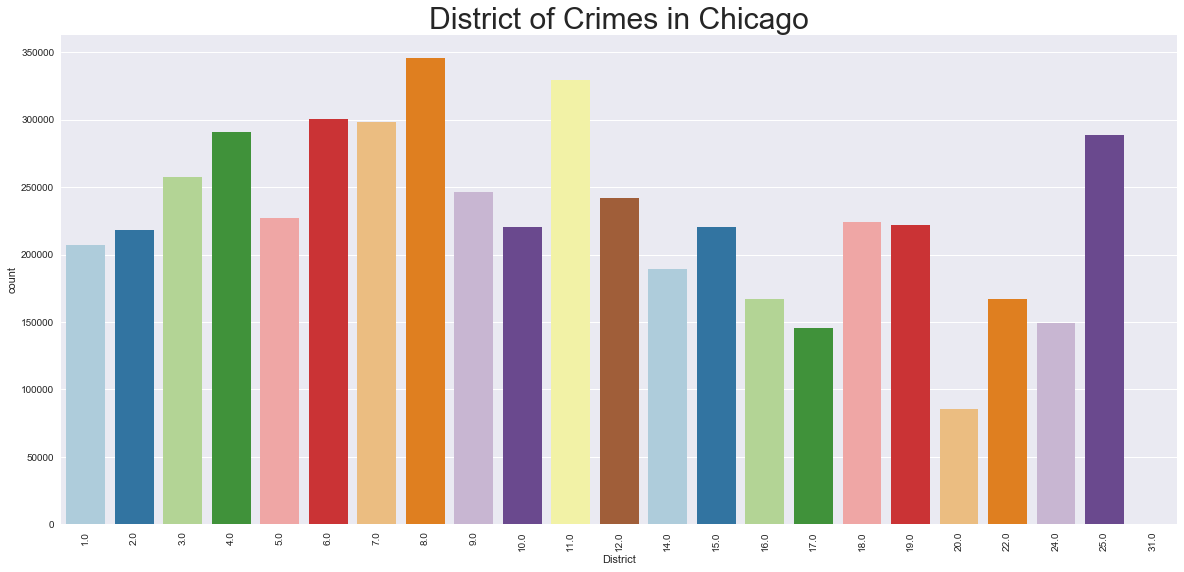

In [22]:
# District with count of respective crimes
plt.rcParams['figure.figsize'] = (20, 9)
sns.countplot(chicago['District'], palette = 'Paired')
plt.title('District of Crimes in Chicago', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

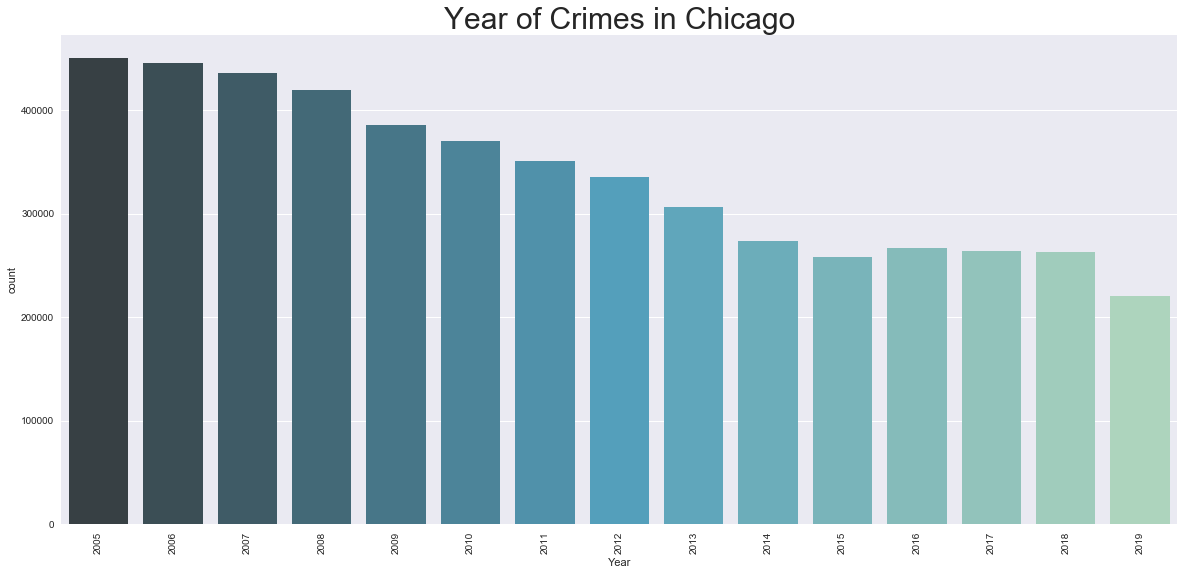

In [23]:
# District with count of respective crimes

plt.rcParams['figure.figsize'] = (20, 9)
sns.countplot(chicago['Year'], palette = 'GnBu_d')
plt.title('Year of Crimes in Chicago', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

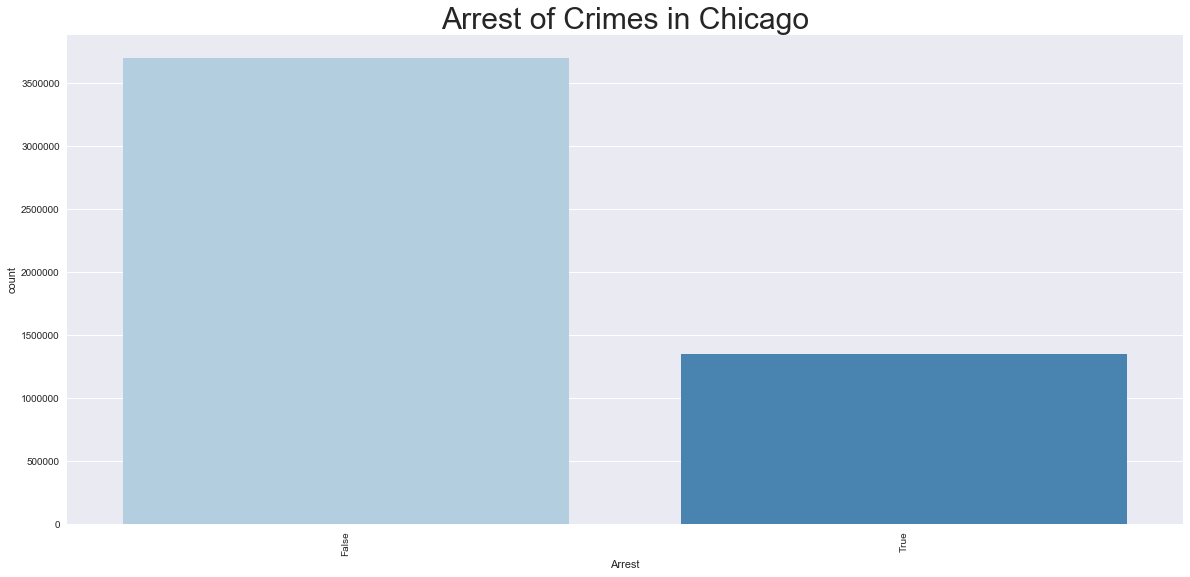

In [24]:
# Arrest or Non-arrest with count of respective crimes
plt.rcParams['figure.figsize'] = (20, 9)
sns.countplot(chicago['Arrest'], palette = 'Blues')
plt.title('Arrest of Crimes in Chicago', fontsize = 30)
plt.xticks(rotation = 90)
plt.show()

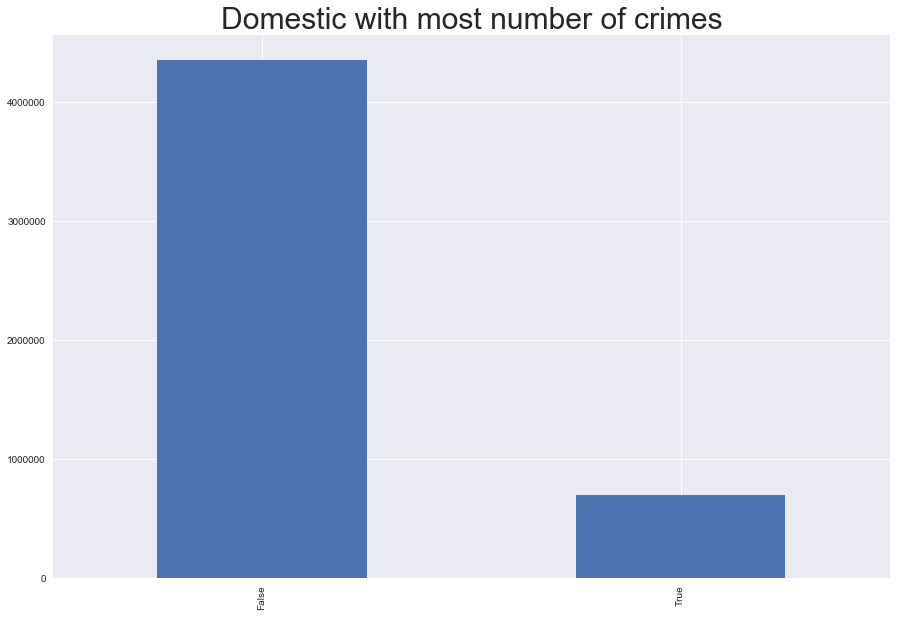

In [25]:
# Domestic vs Non-Domestic with count of respective crimes

plt.rcParams['figure.figsize'] = (20, 9)

chicago['Domestic'].value_counts().head(60).plot.bar(figsize = (15, 10))

plt.title('Domestic with most number of crimes',fontsize = 30)

plt.xticks(rotation = 90)
plt.show()

In [26]:
chicago.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5043049 entries, 63367 to 7008905
Data columns (total 15 columns):
ID                      int64
Date                    datetime64[ns]
Block                   object
IUCR                    object
Primary Type            object
Description             object
Location Description    object
Arrest                  bool
Domestic                bool
District                float64
Ward                    float64
Community Area          float64
Year                    int32
Latitude                float64
Longitude               float64
dtypes: bool(2), datetime64[ns](1), float64(5), int32(1), int64(1), object(5)
memory usage: 529.0+ MB


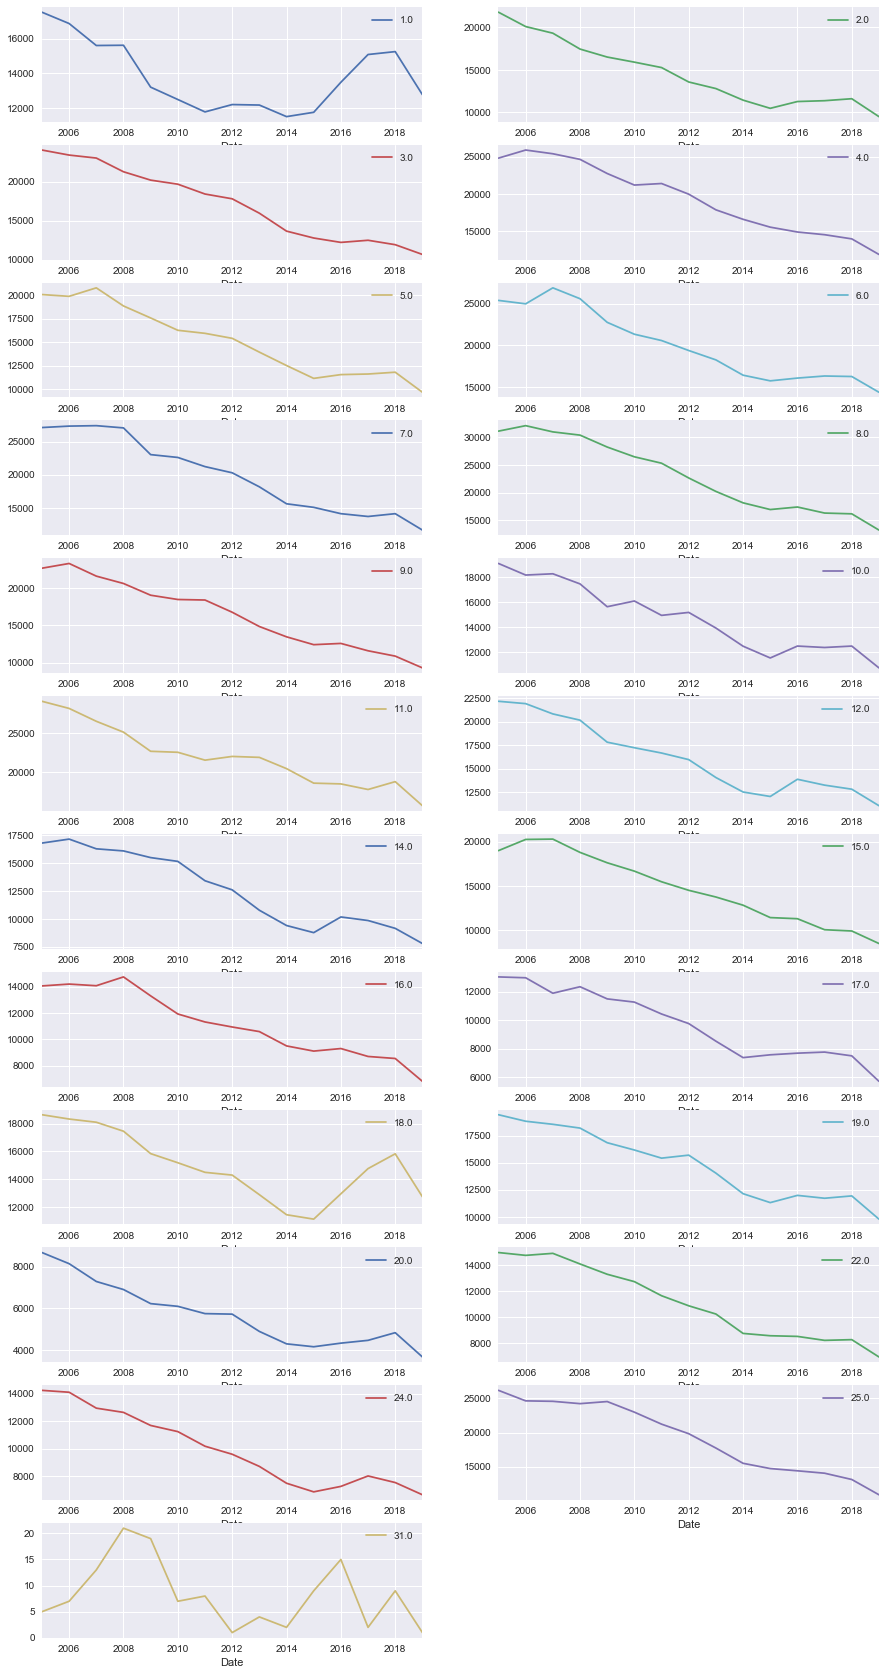

In [27]:
# Crime size based on the district thorughout the years
crimes_count_date = chicago.pivot_table('ID', aggfunc=np.size, columns='District', index=chicago['Date'].dt.year, fill_value=0)
plo = crimes_count_date.plot(figsize=(15, 30), subplots=True, layout=(-1, 2), sharex=False, sharey=False)

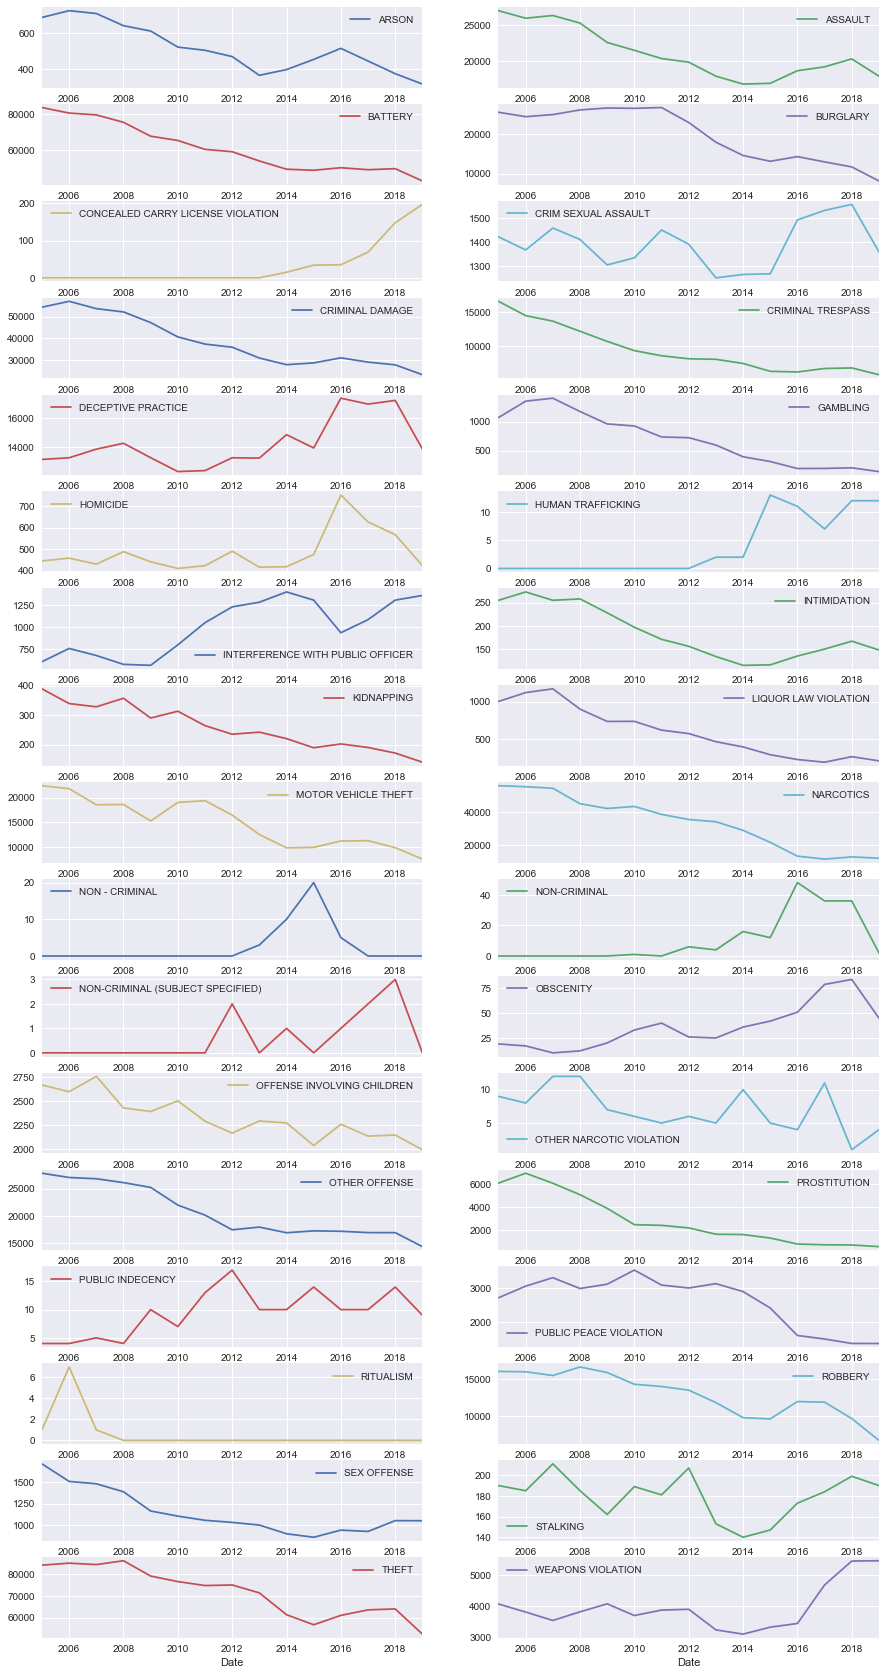

In [28]:
# crime based on the crime type through the years
crimes_count_date = chicago.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=chicago['Date'].dt.year, fill_value=0)
plo_ct = crimes_count_date.plot(figsize=(15, 30), subplots=True, layout=(-1, 2), sharex=False, sharey=False)

In [29]:
# crime based on the crime type through the years in each district
crimes_count_date = chicago.pivot_table('ID', aggfunc=np.size, columns=['Primary Type', 'District'], index=chicago['Date'].dt.year, fill_value=0)
crimes_count_date.head()

Primary Type ARSON                                               ...  \
District      1.0  2.0  3.0  4.0  5.0  6.0  7.0  8.0  9.0  10.0  ...   
Date                                                             ...   
2005             3   27   20   49   32   22   54   65   60   35  ...   
2006             8   18   32   33   42   38   51   83   43   62  ...   
2007             4    8   40   53   36   23   50   62   55   48  ...   
2008             2   10   25   39   45   34   51   52   50   44  ...   
2009             2    9   18   41   31   32   48   67   50   36  ...   

Primary Type WEAPONS VIOLATION                                               
District                  14.0 15.0 16.0 17.0 18.0 19.0 20.0 22.0 24.0 25.0  
Date                                                                         
2005                       128  232   64   78   60   46   28  145   93  295  
2006                       125  212   43   72   47   44   29  120   95  244  
2007                        79  196   51   67   59   44   18  169   73  226  
2008                       104  191   49   60   50   41   31  144   84  232  
2009                        99  188   60   63   41   44   26  202   73  254  

[5 rows x 716 columns]

We will now plot the top five violent and five non-violent crimes based on the police district

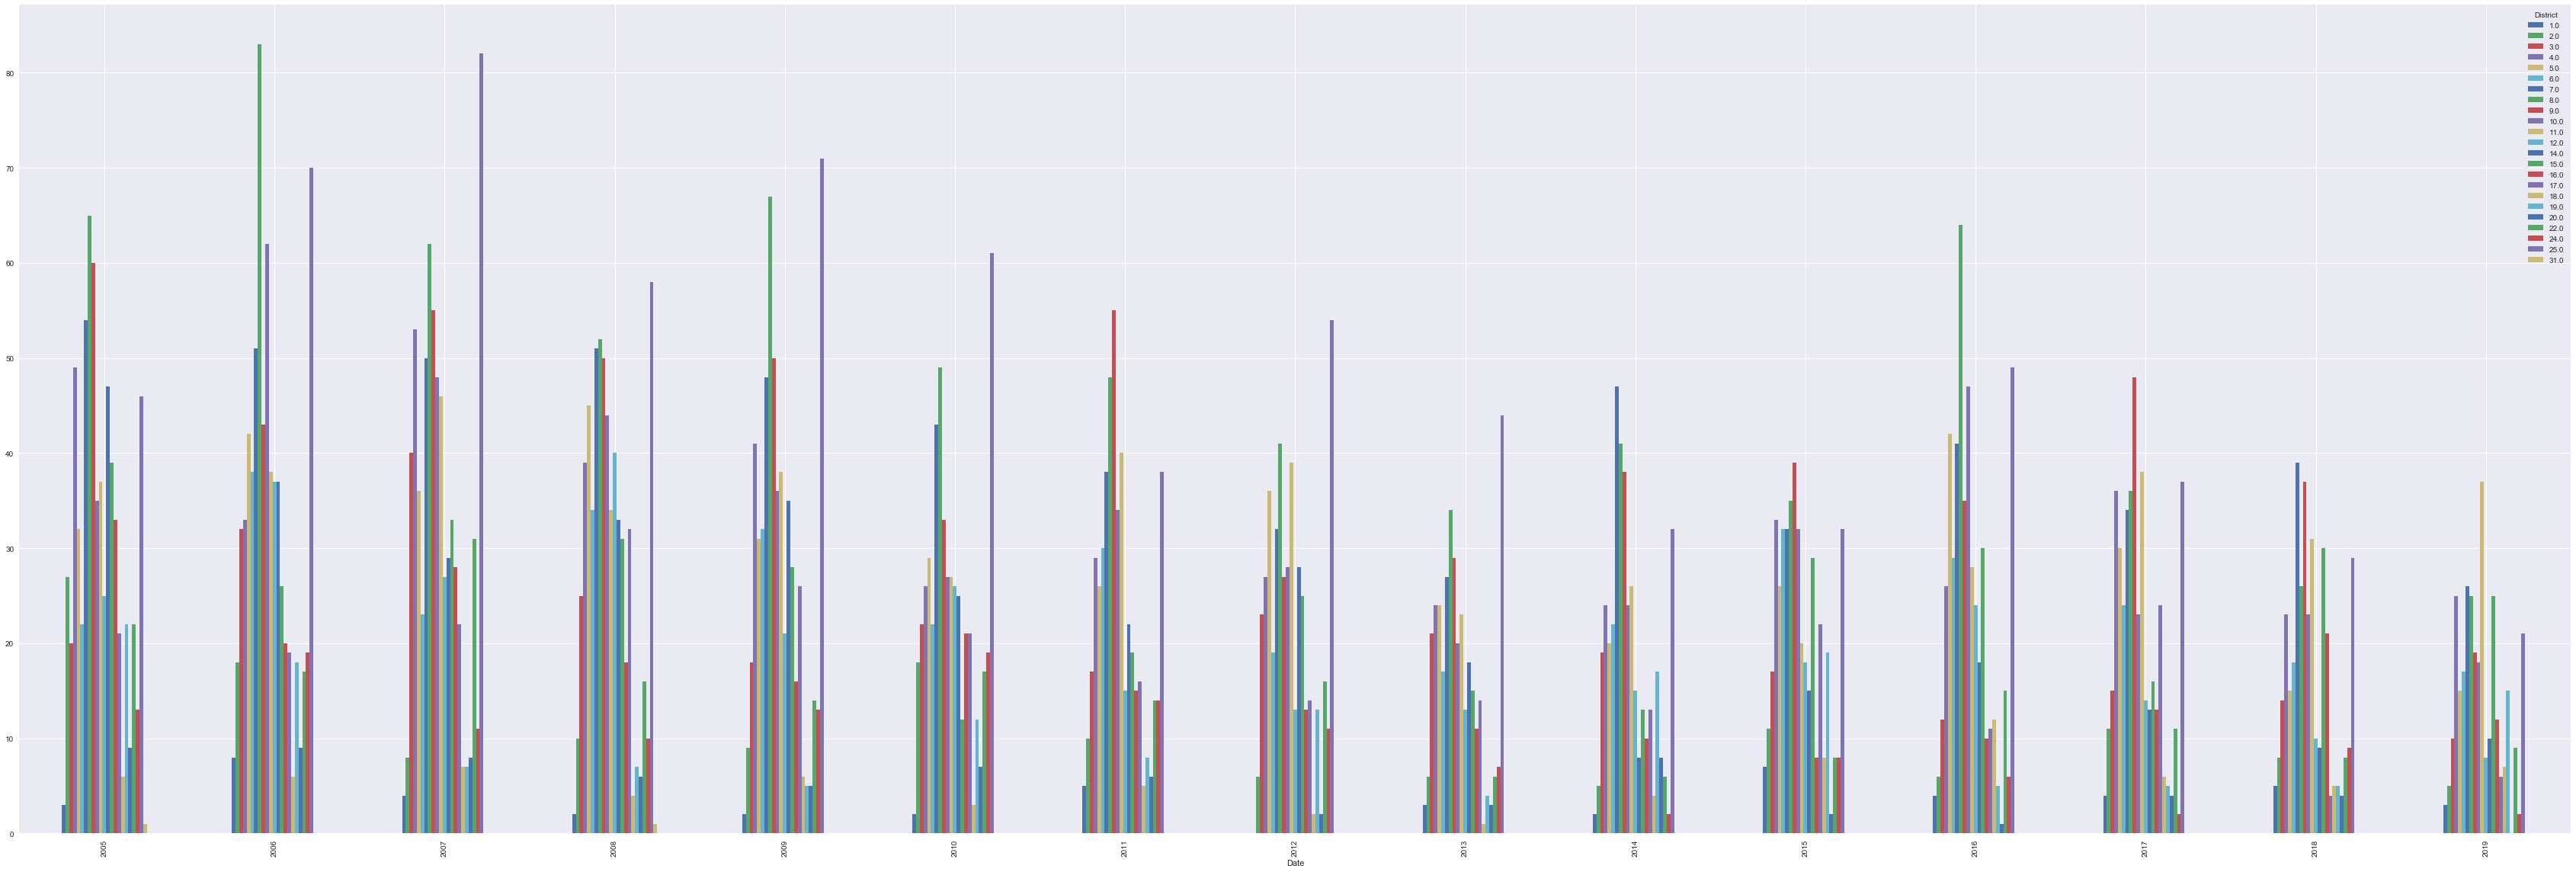

In [30]:
#Plot of arson throughout the years in various districts
plo_arson = crimes_count_date['ARSON'].plot(figsize=(60,20),sharex=False, sharey=False , kind='bar')

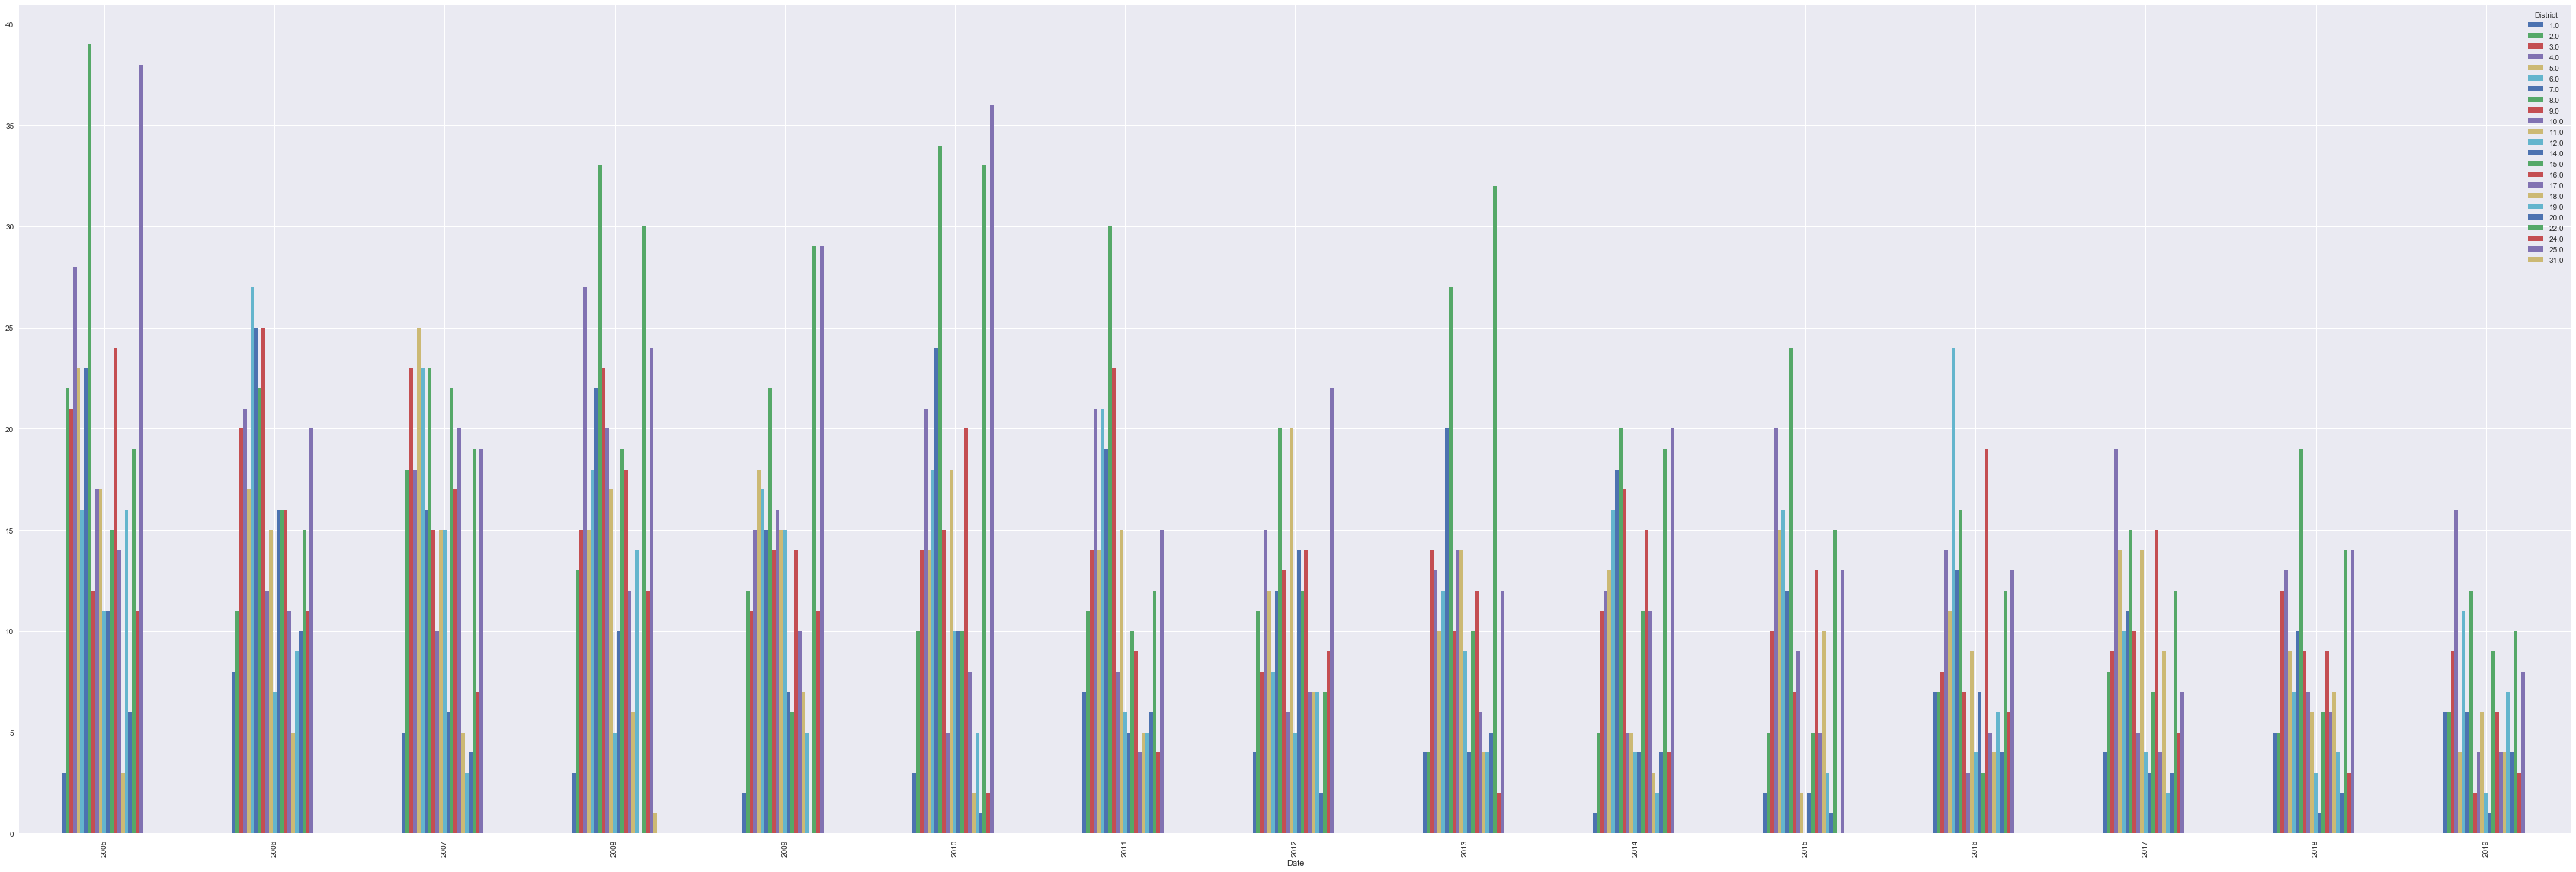

In [31]:
#Plot of KIDNAPPING throughout the years in various districts
plo_kidnapping = crimes_count_date['KIDNAPPING'].plot(figsize=(60,20),sharex=False, sharey=False , kind='bar')

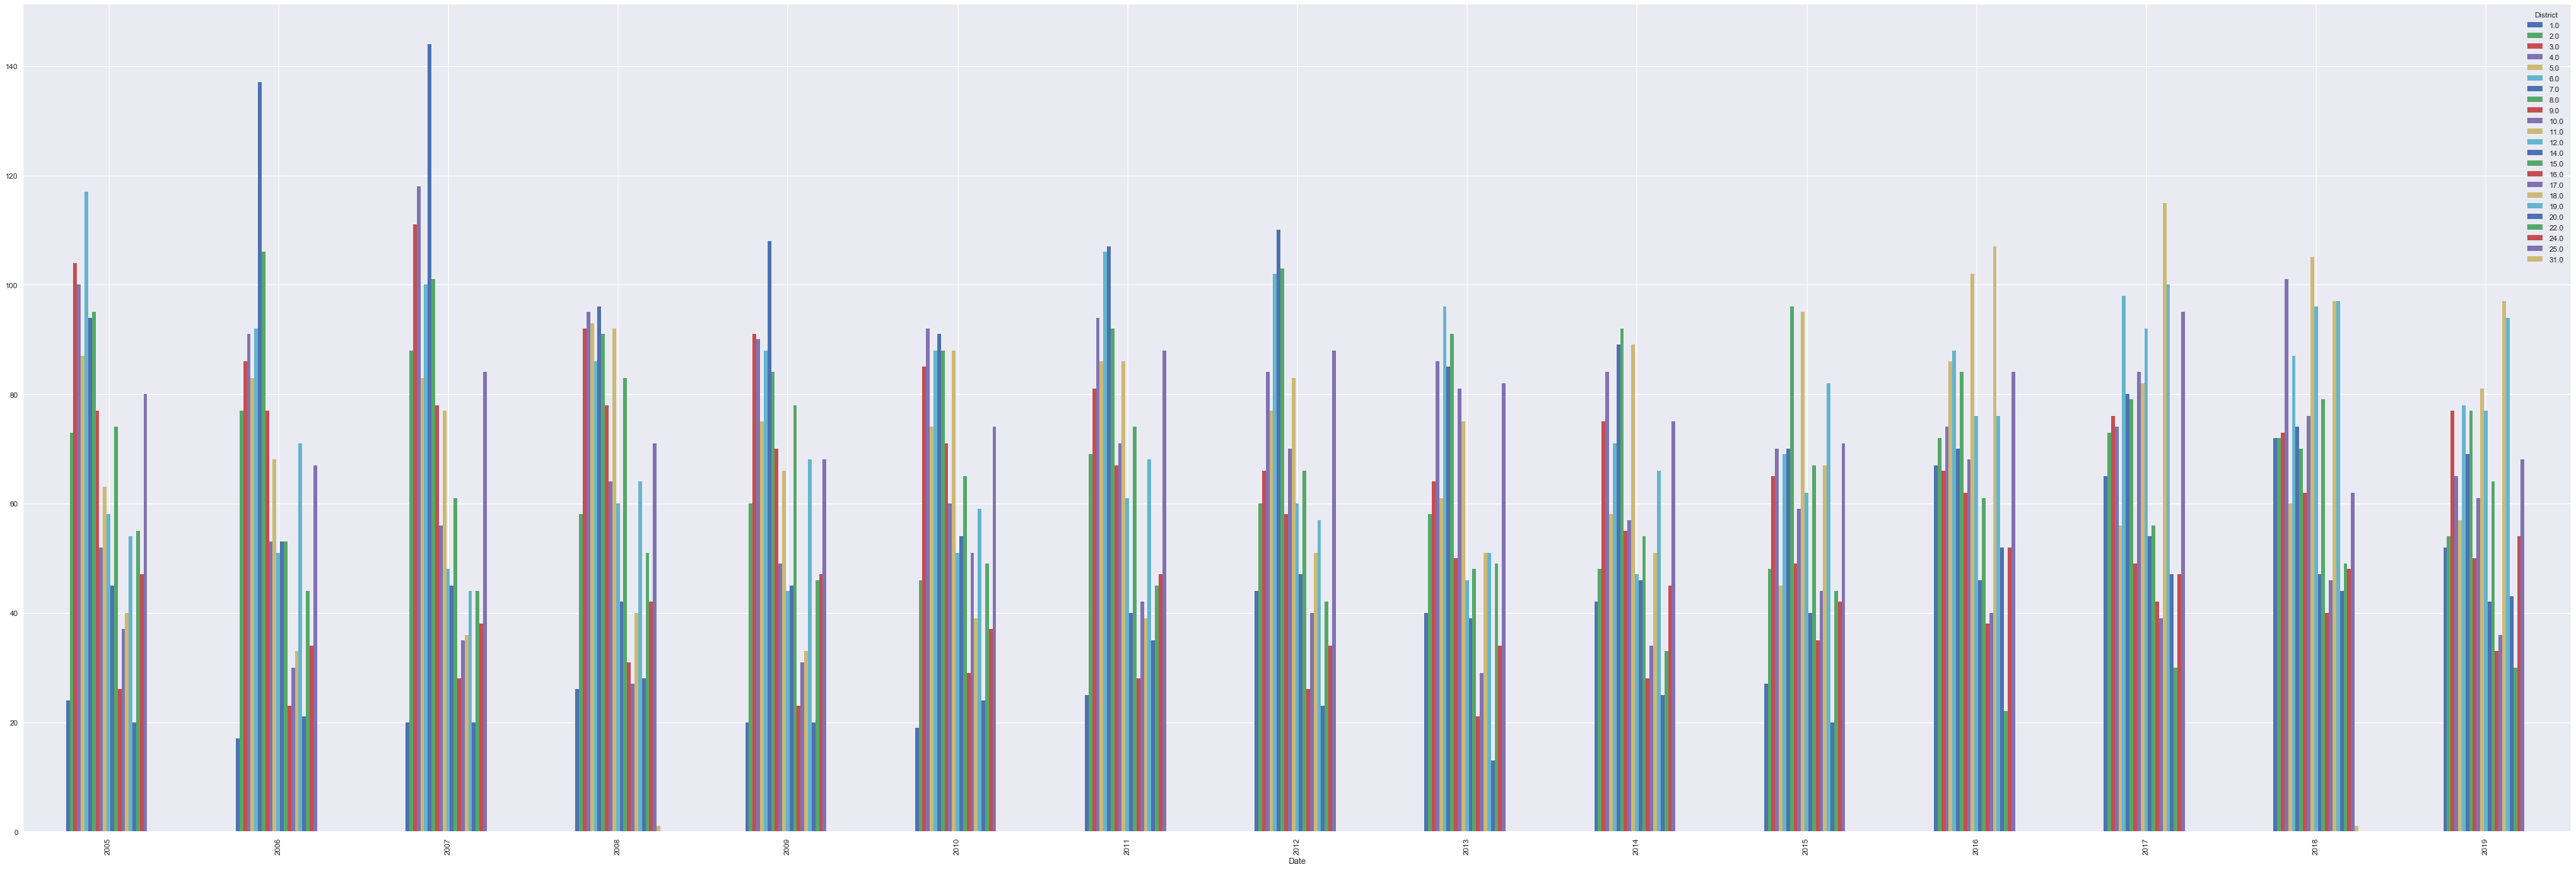

In [32]:
#Plot of CRIM SEXUAL ASSAULT throughout the years in various districts
plo_assault_crim = crimes_count_date['CRIM SEXUAL ASSAULT'].plot(figsize=(60,20),sharex=False, sharey=False , kind='bar')

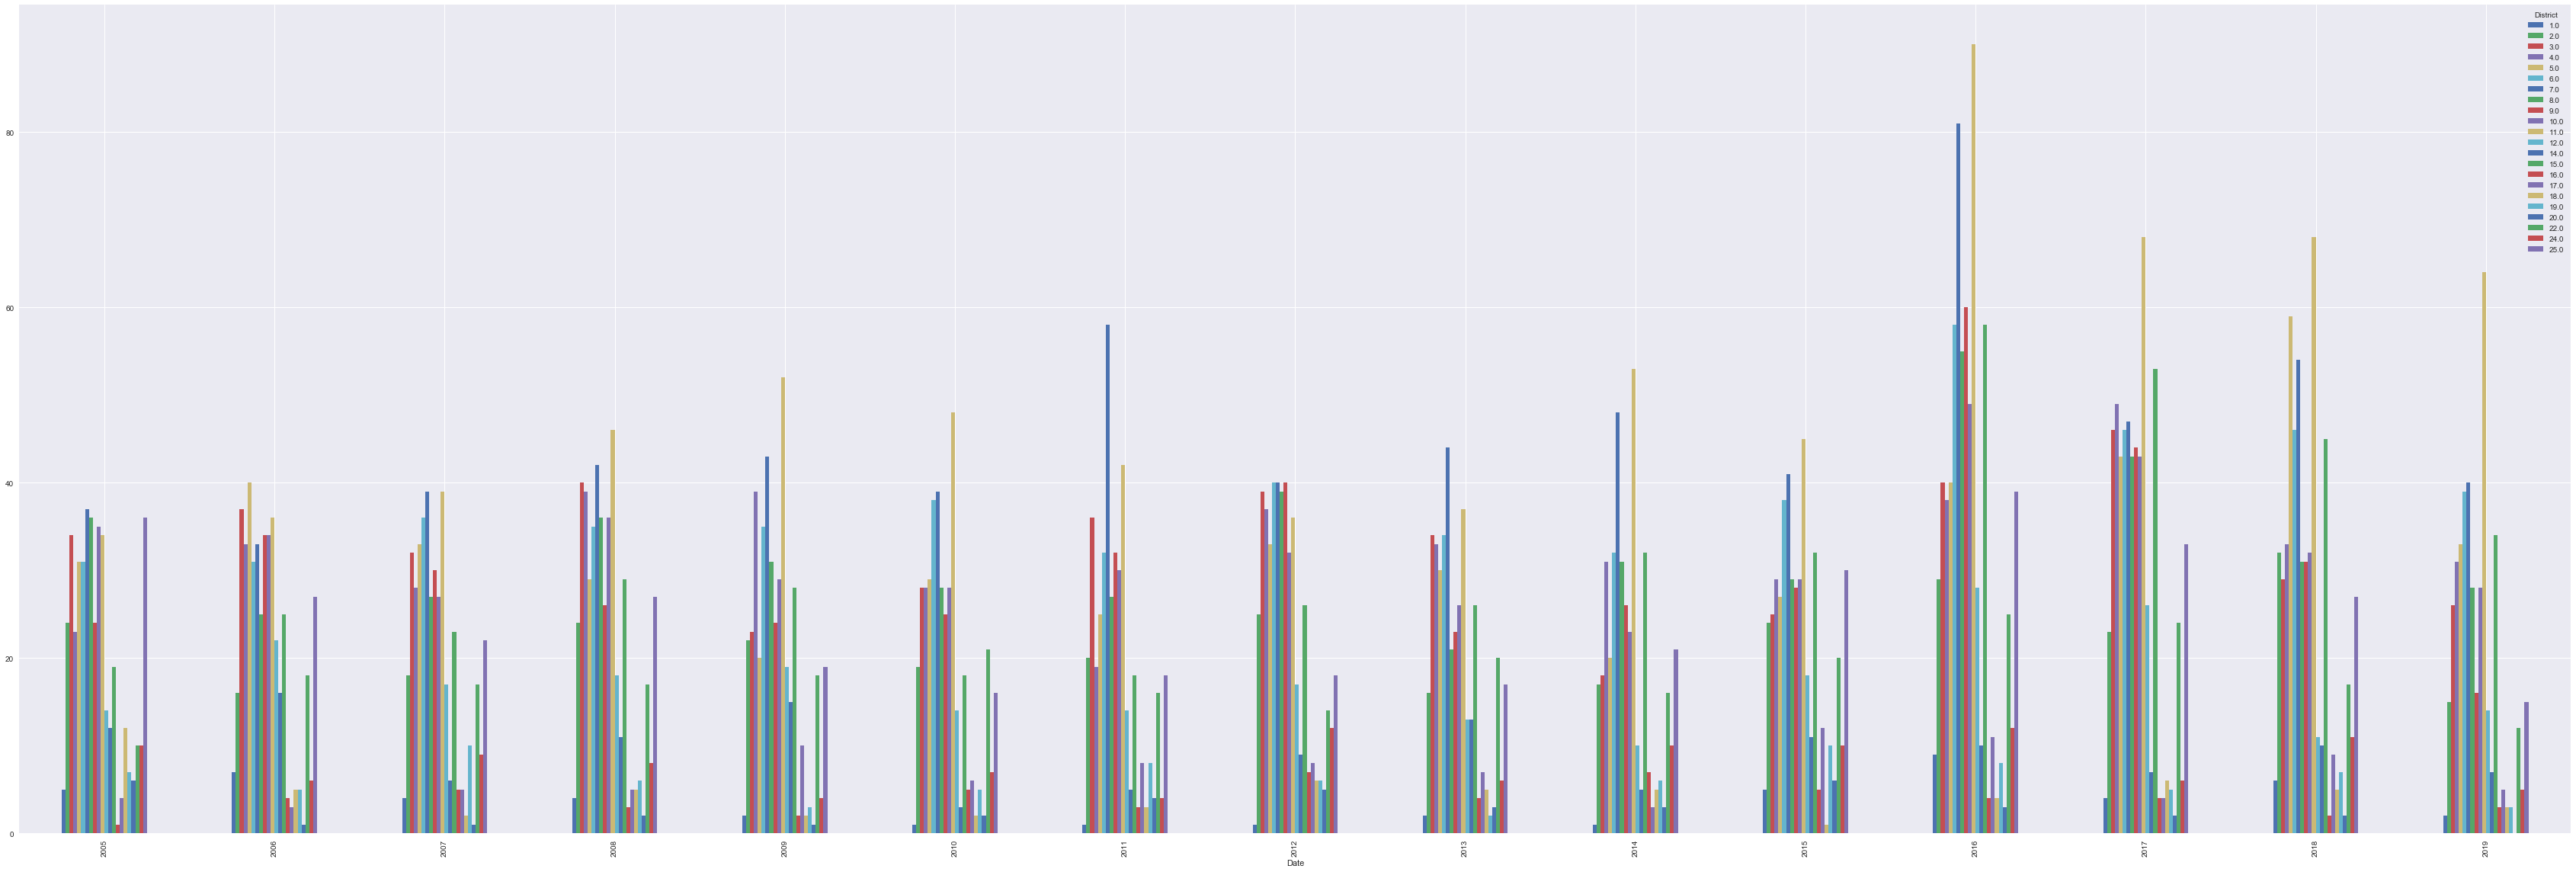

In [33]:
#Plot of HOMICIDE throughout the years in various districts
plo_homicide = crimes_count_date['HOMICIDE'].plot(figsize=(60,20),sharex=False, sharey=False , kind='bar')

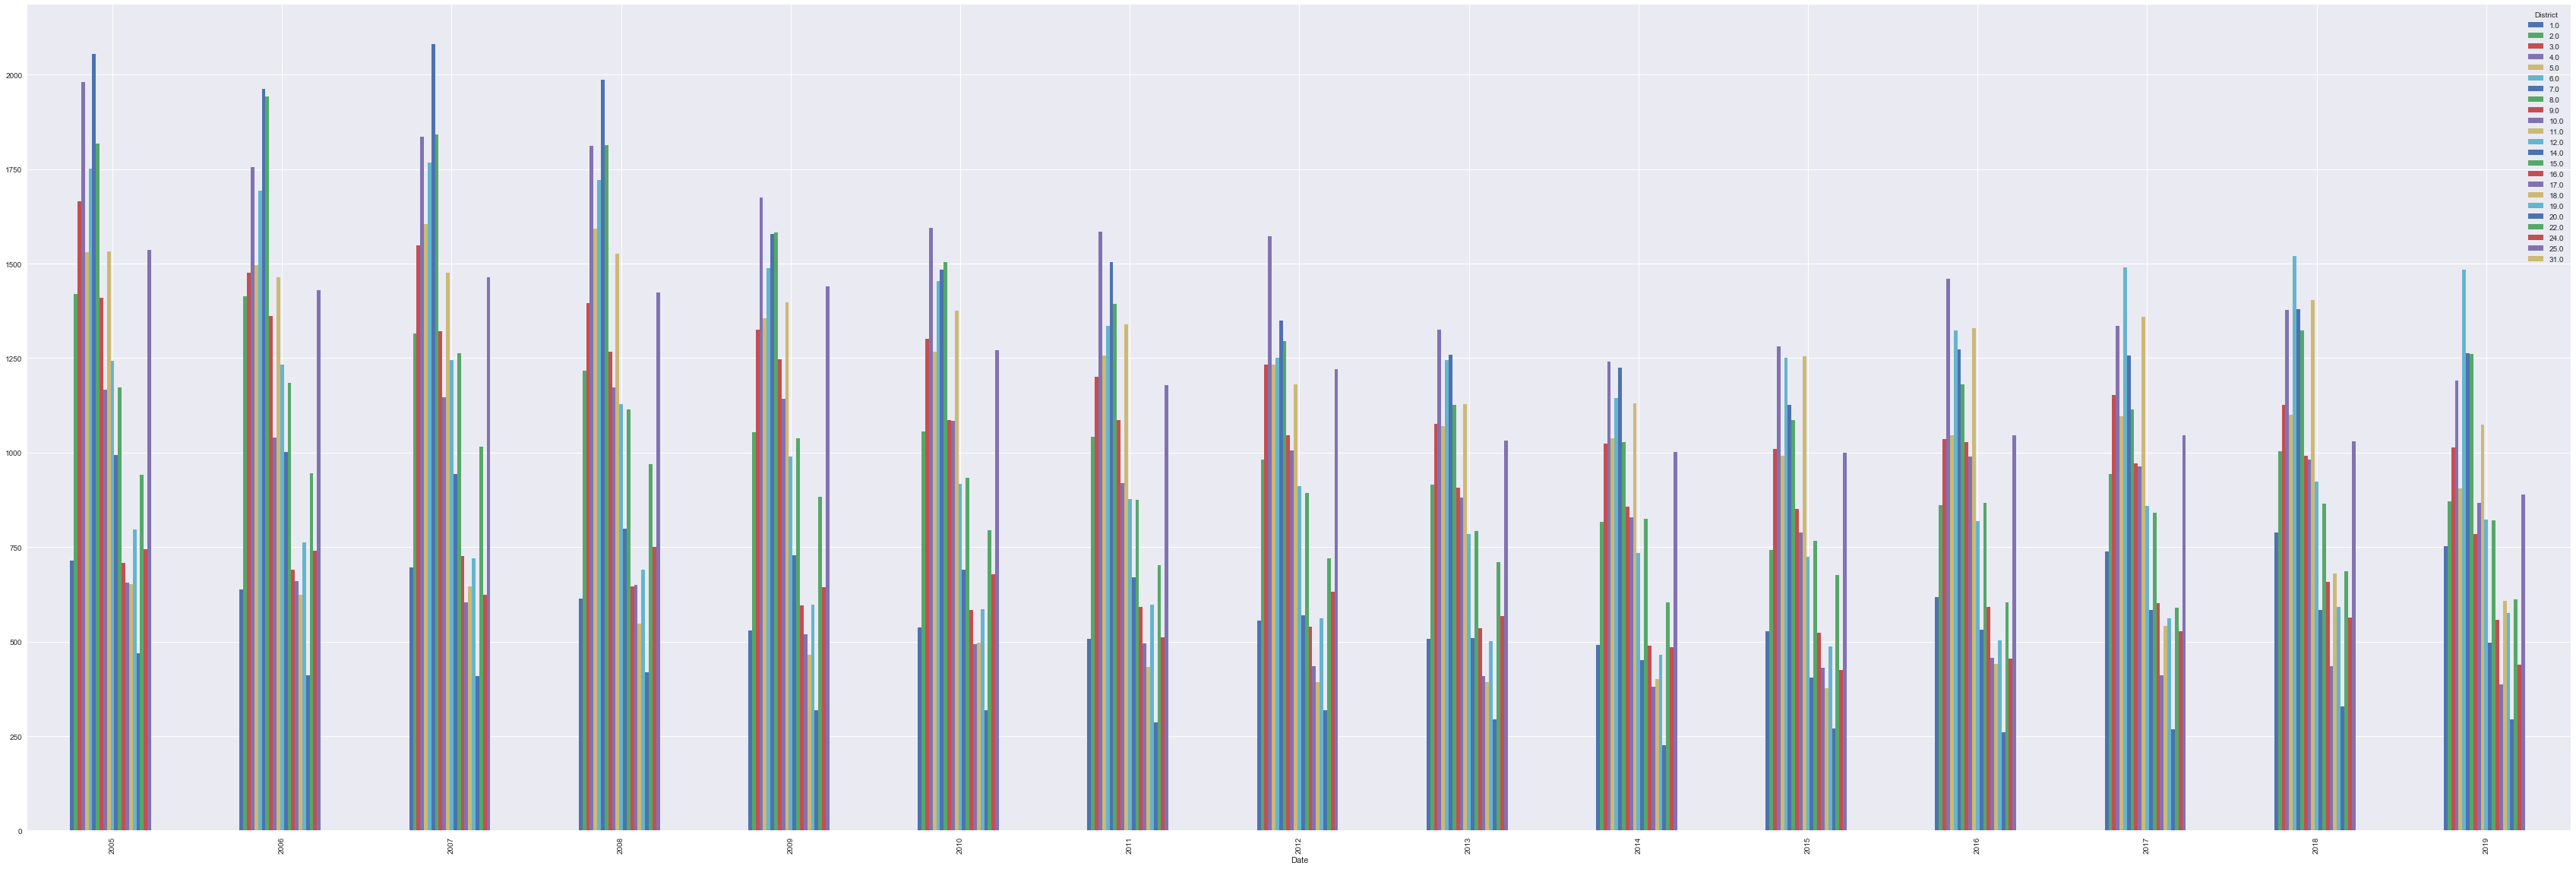

In [34]:
#Plot of ASSAULT throughout the years in various districts
plo_assault = crimes_count_date['ASSAULT'].plot(figsize=(60,20),sharex=False, sharey=False , kind='bar')

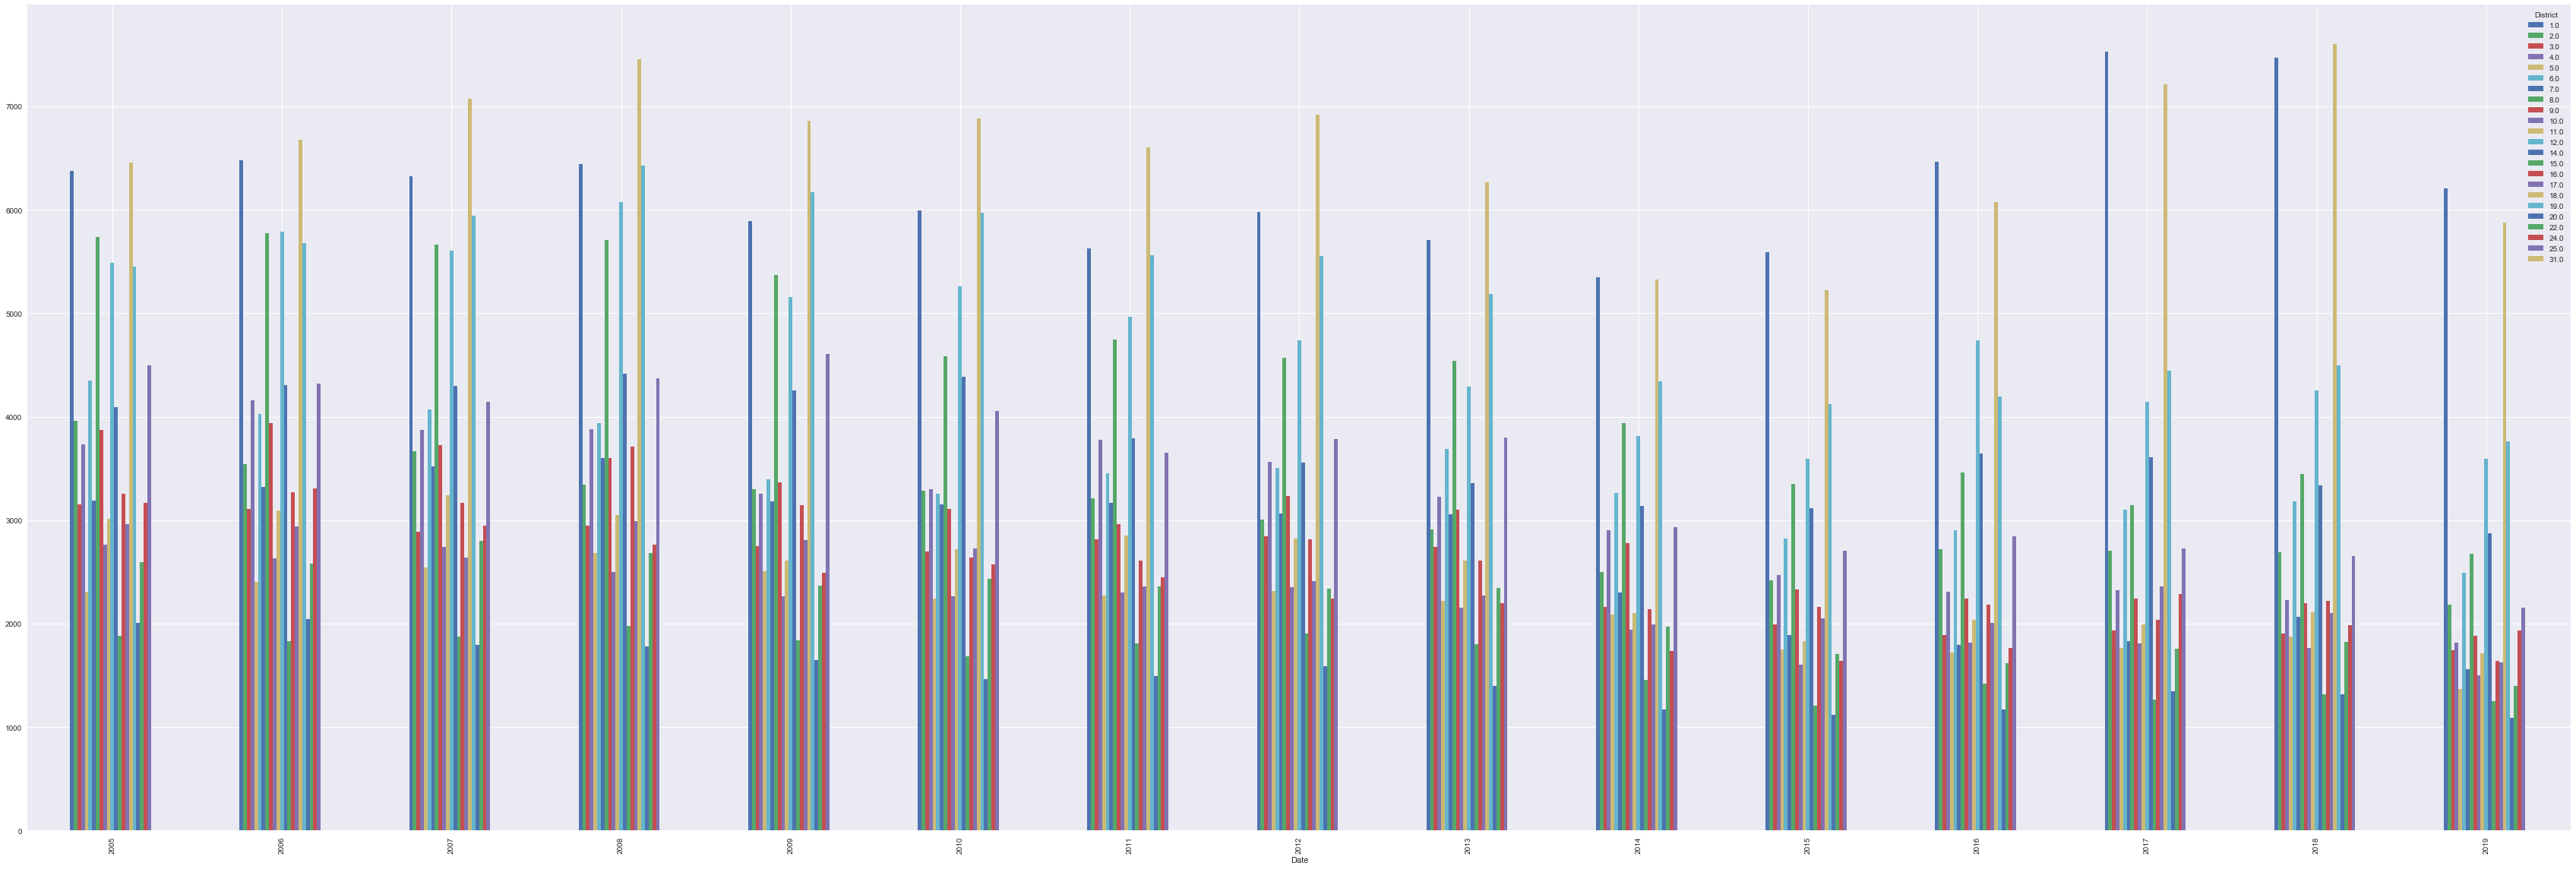

In [35]:
#Plot of THEFT throughout the years in various districts
plo_theft = crimes_count_date['THEFT'].plot(figsize=(60,20),sharex=False, sharey=False , kind='bar')

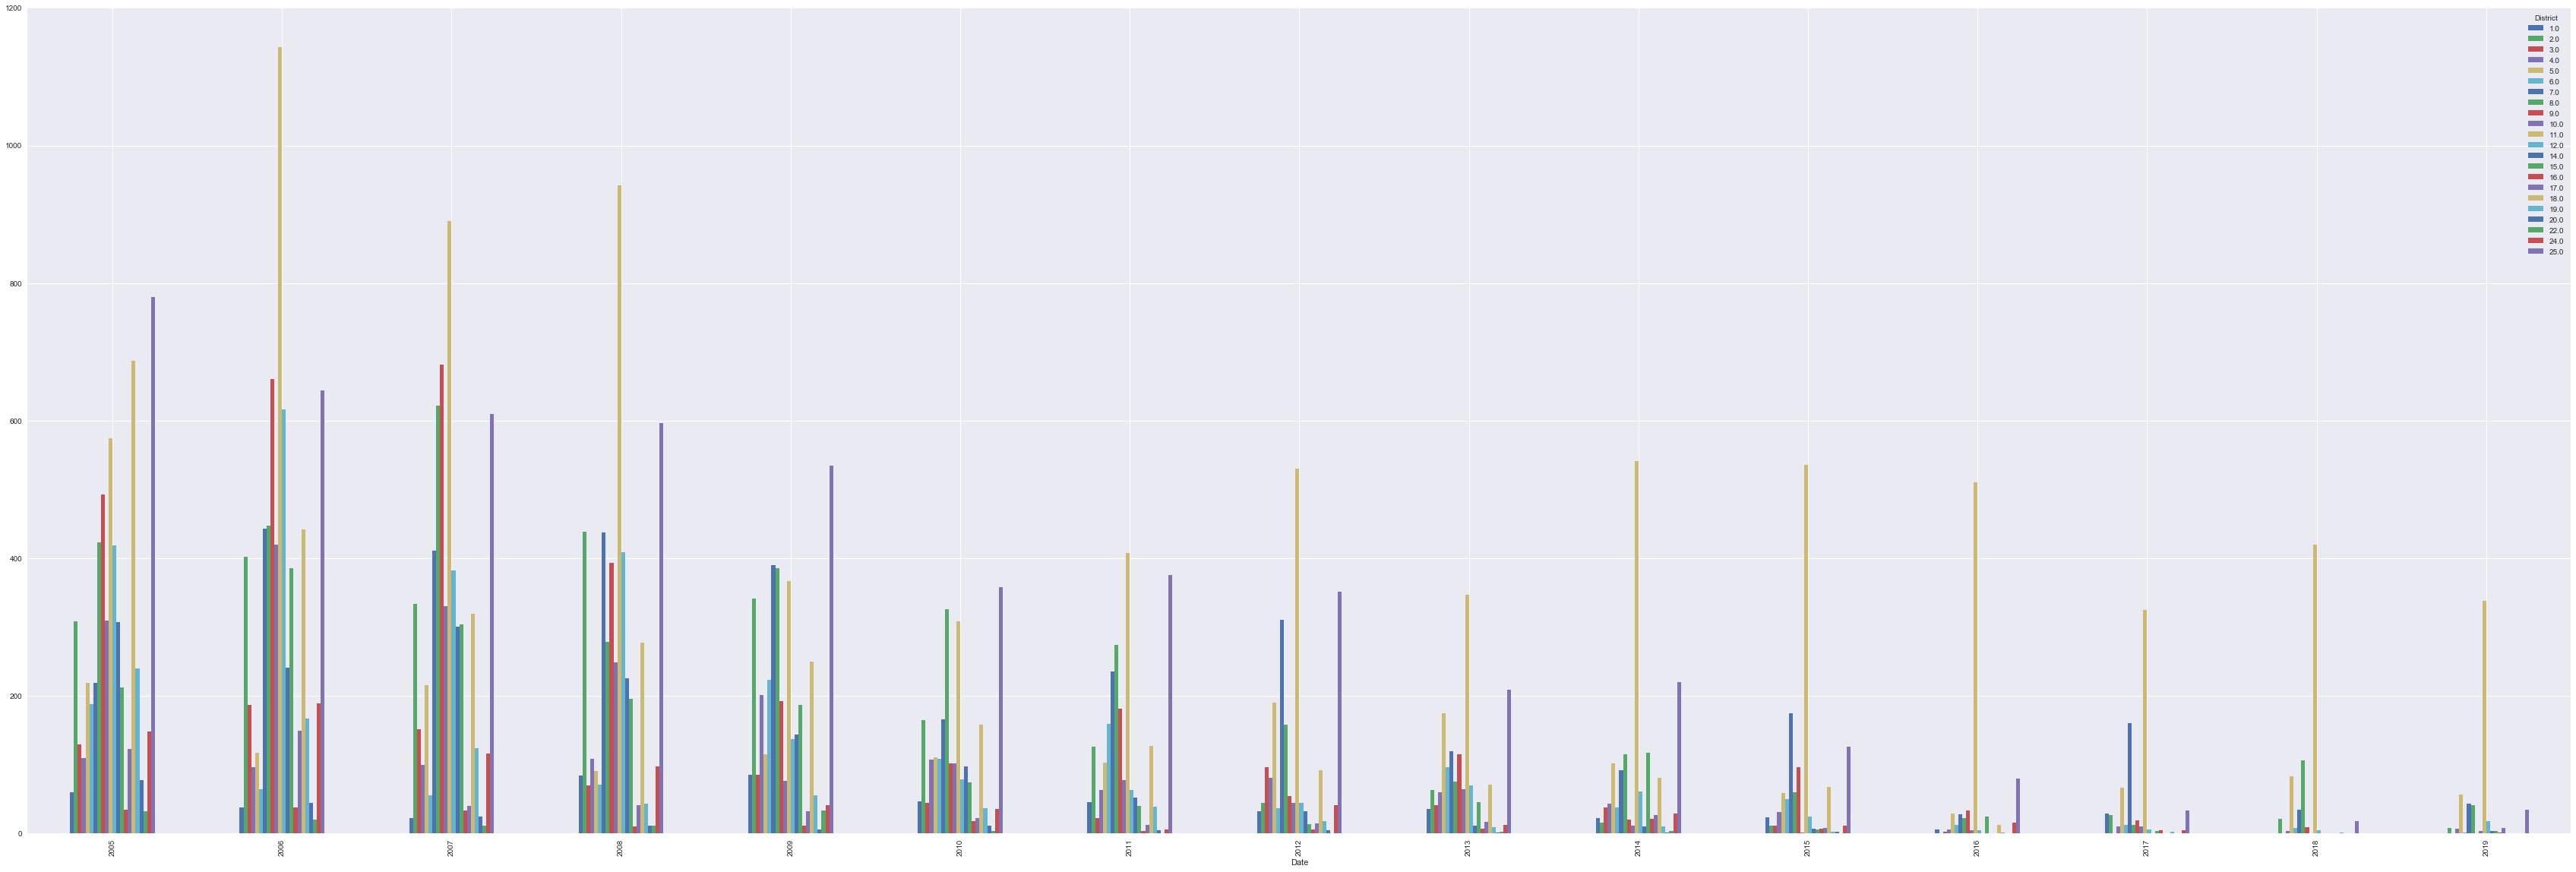

In [36]:
#Plot of PROSTITUTION throughout the years in various districts
plo_pros = crimes_count_date['PROSTITUTION'].plot(figsize=(60,20),sharex=False, sharey=False , kind='bar')

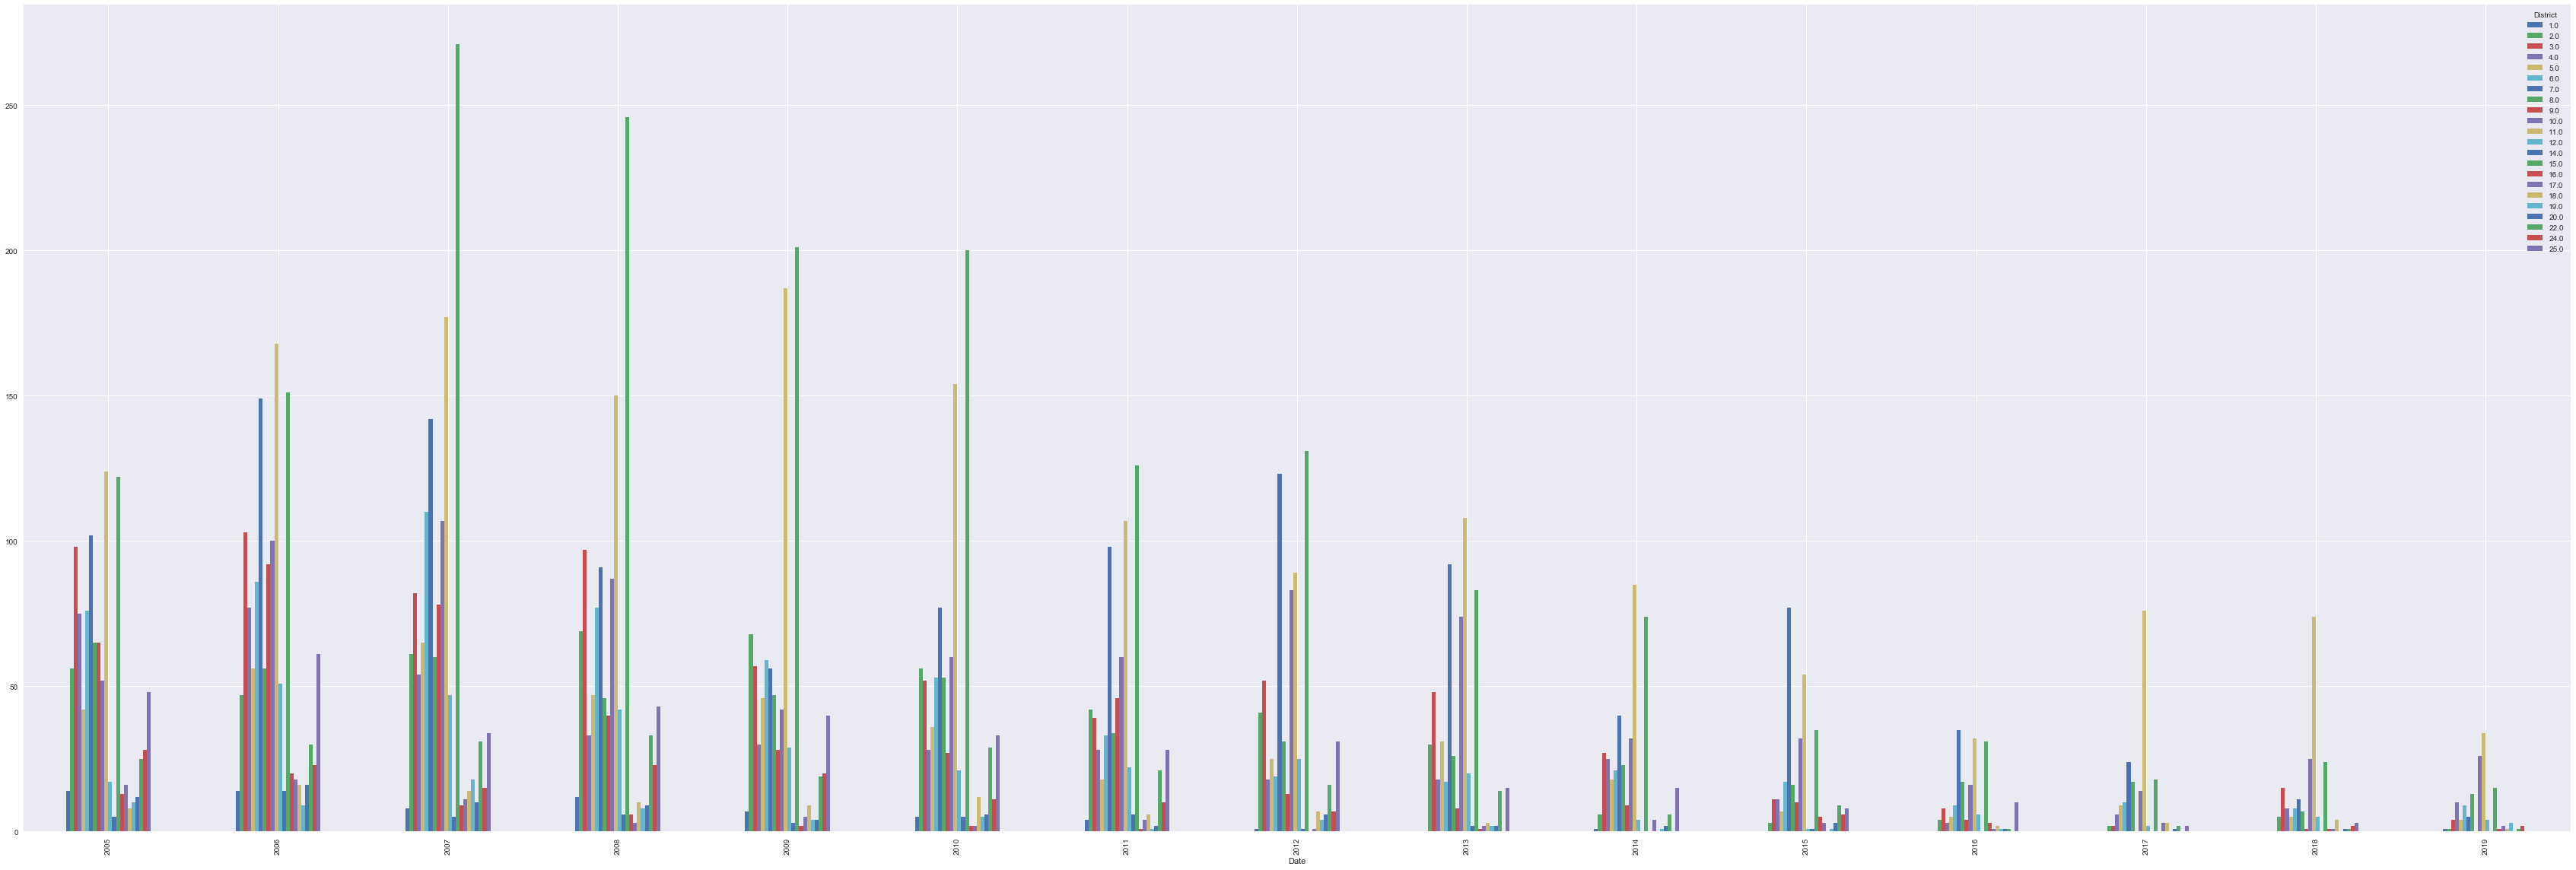

In [37]:
#Plot of GAMBLING throughout the years in various districts
plo_gambling = crimes_count_date['GAMBLING'].plot(figsize=(60,20),sharex=False, sharey=False , kind='bar')

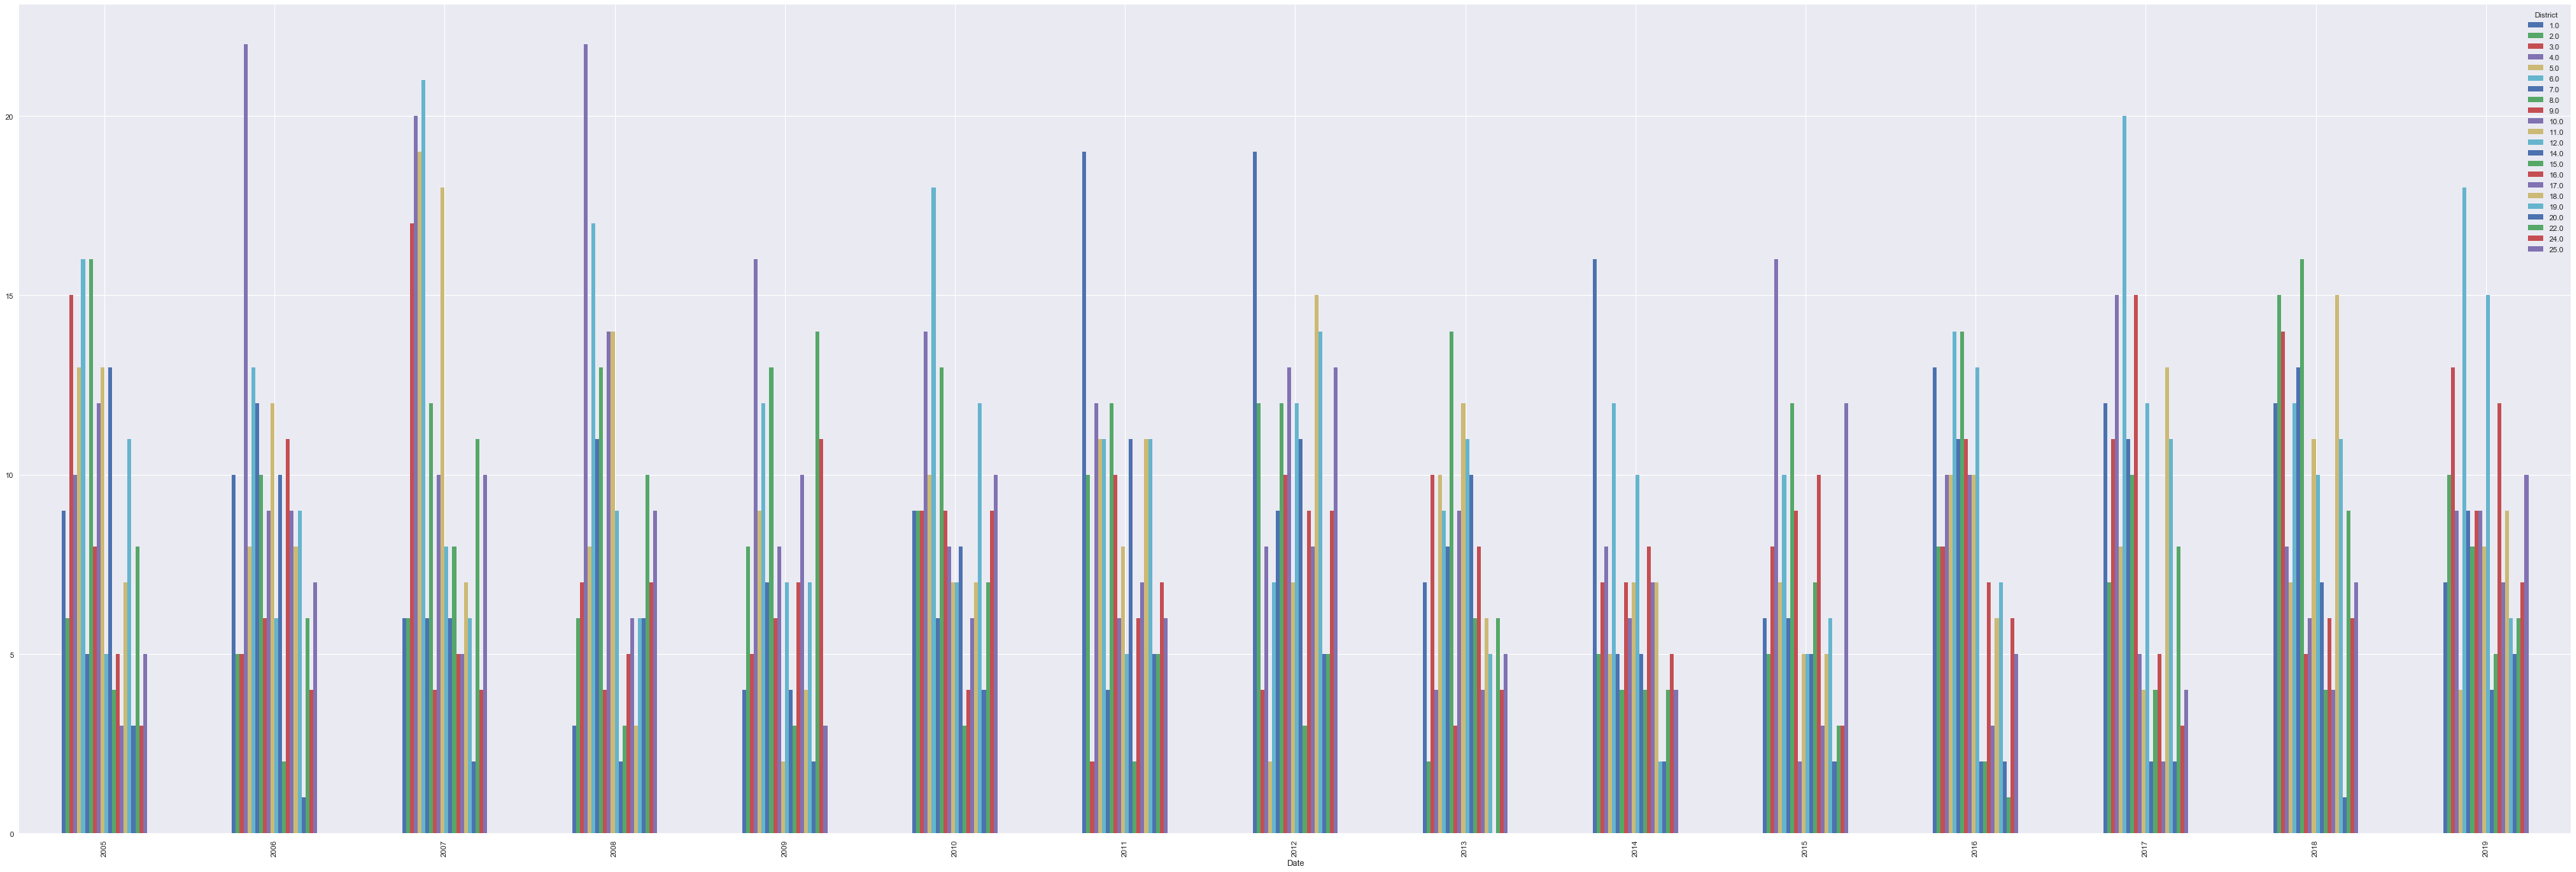

In [38]:
#Plot of STALKING throughout the years in various districts
plo_stalking = crimes_count_date['STALKING'].plot(figsize=(60,20),sharex=False, sharey=False , kind='bar')

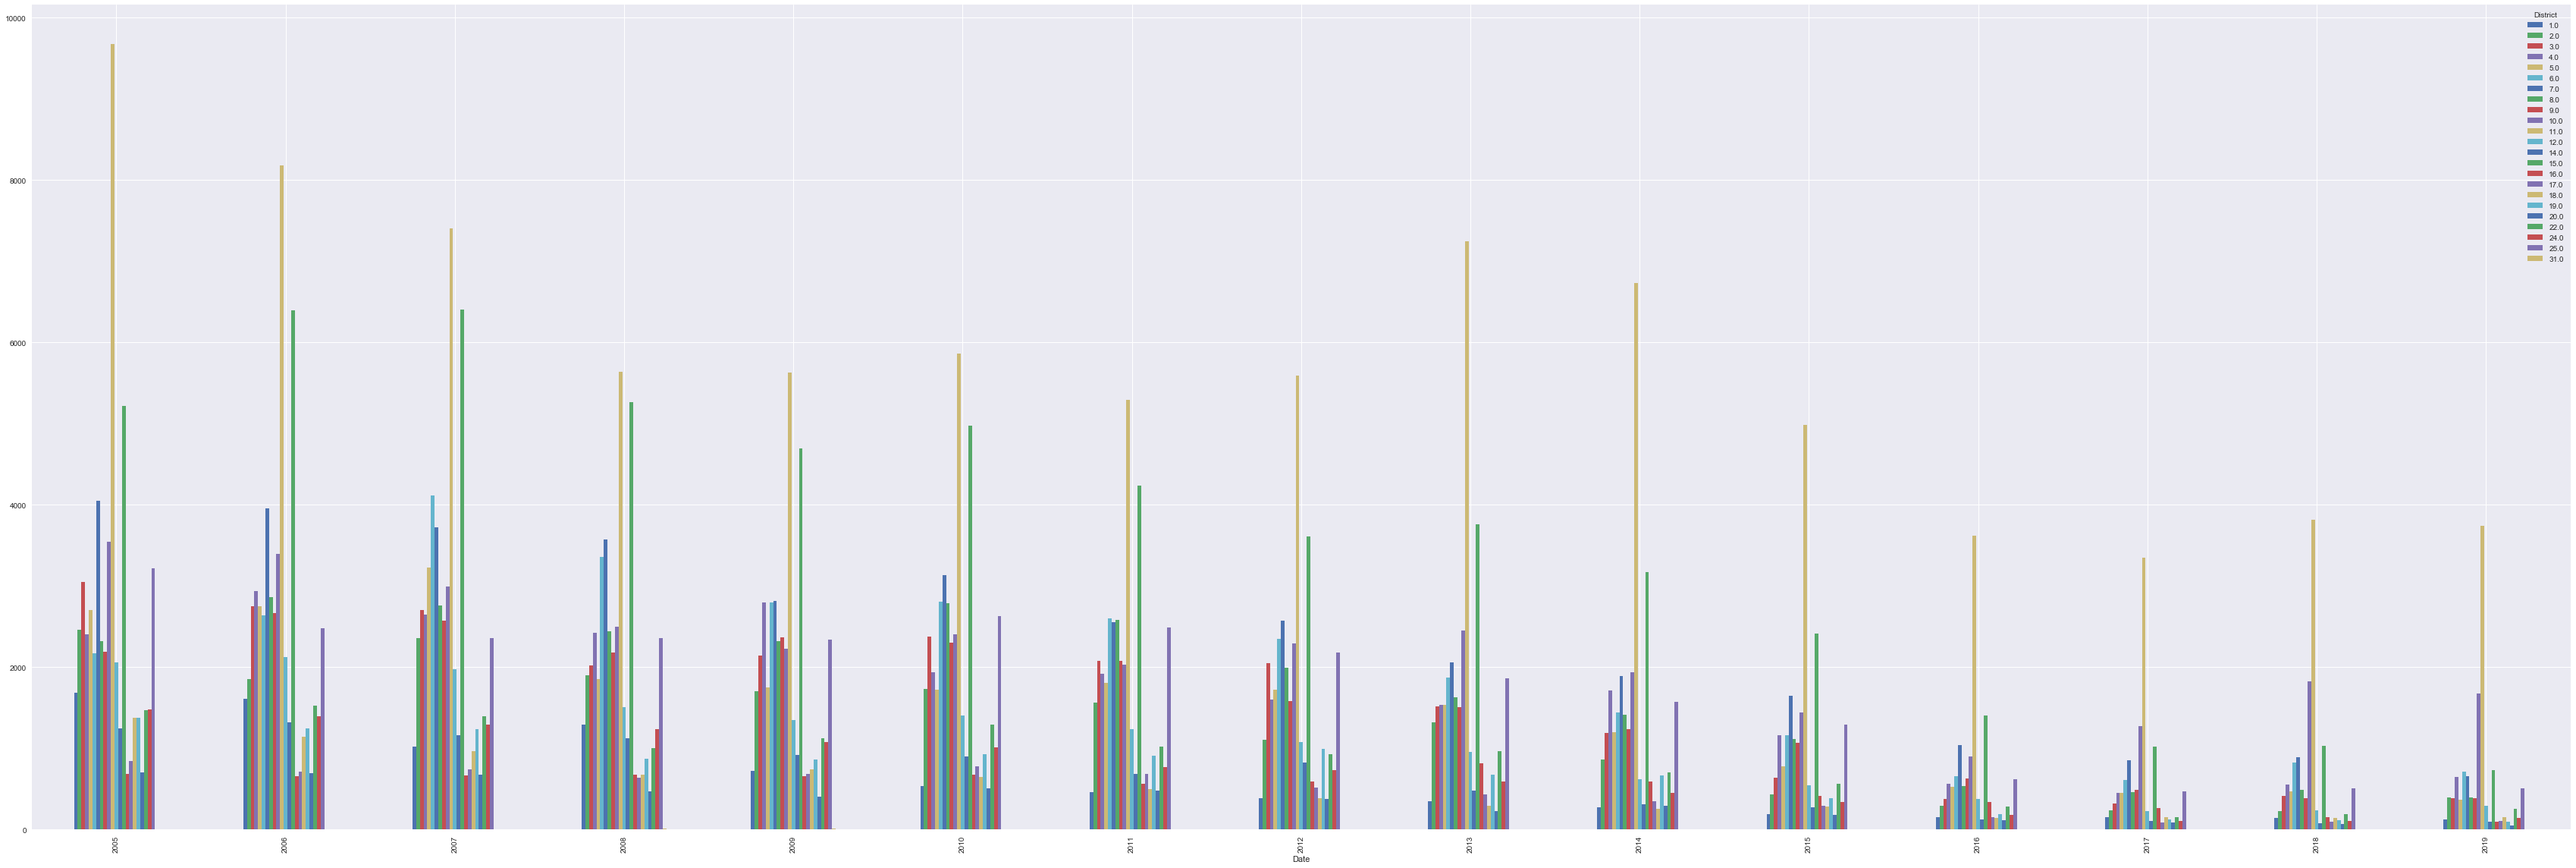

In [39]:
#Plot of NARCOTICS throughout the years in various districts
plo_narcotics = crimes_count_date['NARCOTICS'].plot(figsize=(60,20),sharex=False, sharey=False , kind='bar')

In [40]:
#violent : arson, kidnapping, sexual assault , homicide, assault 
#Non-violent : theft , prostituition, gambling, stalking , narcotics)
chicago_location_plot = chicago_crimes[chicago_crimes['Year'] >= 2014]
ctypes = ['THEFT', 'NARCOTICS', 'ASSAULT', 'PROSTITUTION', 'CRIM SEXUAL ASSAULT', 
          'HOMICIDE', 'ARSON', 'GAMBLING',  'KIDNAPPING', 'STALKING',]
fig = plt.figure(figsize=(15,35))
for i, crime_type in enumerate(ctypes):
    ax = fig.add_subplot(int(np.ceil(float(len(ctypes)) / 4)), 4, i+1)
    crimes_ = chicago_location_plot[chicago_location_plot['Primary Type']==crime_type]
    sns.regplot('Longitude', 'Latitude',
               data= crimes_[['Longitude','Latitude']],
               fit_reg=False,
               scatter_kws={'alpha':.1, 'color':'grey'},
               ax=ax)
    sns.kdeplot(X='Longitude', Y='Latitude',
                data= crimes_[['Longitude','Latitude']],
                cmap="jet", 
                bw=.005,
                #n_levels=10,
                cbar=True, 
                shade=True, 
                shade_lowest=False,
                ax = ax)
    ax.set_title(crime_type)
    ax.set_xlim(-87.9,-87.5)
    ax.set_ylim(41.60,42.05)
    ax.set_axis_off()    
plt.show()

C:\Users\praja\Documents\softwares\Anaconda\lib\site-packages\seaborn\distributions.py:679: UserWarning: Passing a 2D dataset for a bivariate plot is deprecated in favor of kdeplot(x, y), and it will cause an error in future versions. Please update your code.
  warnings.warn(warn_msg, UserWarning)
C:\Users\praja\Documents\softwares\Anaconda\lib\site-packages\seaborn\distributions.py:423: UserWarning: The following kwargs were not used by contour: 'X', 'Y'
  cset = contour_func(xx, yy, z, n_levels, **kwargs)


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001D1A54199D8> (for post_execute):


KeyboardInterrupt: 

### 3. Classification - Random Forest

Let us try to classify which type of crime the given data is using Random Forest Classification

In [38]:
#Let us first see the different types of crimes on Chicago. This information is contained in 'Primary Type' feature of the dataset
chicago['Primary Type'].value_counts()

THEFT                                1076826
BATTERY                               915993
CRIMINAL DAMAGE                       576198
NARCOTICS                             504476
ASSAULT                               316958
OTHER OFFENSE                         310363
BURGLARY                              295473
MOTOR VEHICLE THEFT                   224214
DECEPTIVE PRACTICE                    213257
ROBBERY                               193018
CRIMINAL TRESPASS                     141886
WEAPONS VIOLATION                      59539
PROSTITUTION                           42658
PUBLIC PEACE VIOLATION                 39113
OFFENSE INVOLVING CHILDREN             34962
CRIM SEXUAL ASSAULT                    20863
SEX OFFENSE                            17190
INTERFERENCE WITH PUBLIC OFFICER       14907
GAMBLING                               10383
LIQUOR LAW VIOLATION                    8896
ARSON                                   7733
HOMICIDE                                7261
KIDNAPPING

In [39]:
#There are 34 different types of crimes that are used to classify any given data under
uniquePrimaryType= chicago['Primary Type'].unique()
print(uniquePrimaryType)
chicago['Primary Type'].nunique()

['SEX OFFENSE' 'OFFENSE INVOLVING CHILDREN' 'BATTERY' 'ASSAULT' 'THEFT'
 'STALKING' 'CRIMINAL DAMAGE' 'MOTOR VEHICLE THEFT' 'OTHER OFFENSE'
 'NARCOTICS' 'CRIM SEXUAL ASSAULT' 'ROBBERY'
 'INTERFERENCE WITH PUBLIC OFFICER' 'CRIMINAL TRESPASS'
 'DECEPTIVE PRACTICE' 'BURGLARY' 'WEAPONS VIOLATION' 'PROSTITUTION'
 'GAMBLING' 'ARSON' 'PUBLIC PEACE VIOLATION' 'KIDNAPPING' 'INTIMIDATION'
 'CONCEALED CARRY LICENSE VIOLATION' 'LIQUOR LAW VIOLATION'
 'PUBLIC INDECENCY' 'OTHER NARCOTIC VIOLATION' 'OBSCENITY'
 'HUMAN TRAFFICKING' 'HOMICIDE' 'NON-CRIMINAL' 'NON - CRIMINAL'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'RITUALISM']


34

In [40]:
chicago.head()

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Latitude,Longitude
63367,11665567,2019-04-10 04:37:00,102XX S VERNON AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,"SCHOOL, PUBLIC, BUILDING",False,False,5.0,9.0,49.0,2019,41.708589,-87.612583
63451,11667968,2019-04-19 01:57:00,002XX N LARAMIE AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,15.0,28.0,25.0,2019,41.884865,-87.755230
63452,11667963,2019-04-12 04:08:00,032XX N KEELER AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,17.0,30.0,16.0,2019,41.940298,-87.732066
63528,11668309,2019-04-25 05:20:00,108XX S DR MARTIN LUTHER KING JR DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,5.0,9.0,49.0,2019,41.697609,-87.613508
63935,11692179,2019-05-13 05:26:00,090XX S RACINE AVE,0560,ASSAULT,SIMPLE,STREET,False,False,22.0,21.0,73.0,2019,41.729973,-87.653167


In [41]:
#Using a copy of the datset to manipulate the values for classification
rfchicago = chicago.copy(deep=True)

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [43]:
#Creating the dependent variable class
factor = pd.factorize(rfchicago['Primary Type'])
rfchicago.species = factor[0]
definitions = factor[1]
print(rfchicago.species)
print(definitions)
#chicago.head()

[ 0  1  1 ...  2  8 29]
Index(['SEX OFFENSE', 'OFFENSE INVOLVING CHILDREN', 'BATTERY', 'ASSAULT',
       'THEFT', 'STALKING', 'CRIMINAL DAMAGE', 'MOTOR VEHICLE THEFT',
       'OTHER OFFENSE', 'NARCOTICS', 'CRIM SEXUAL ASSAULT', 'ROBBERY',
       'INTERFERENCE WITH PUBLIC OFFICER', 'CRIMINAL TRESPASS',
       'DECEPTIVE PRACTICE', 'BURGLARY', 'WEAPONS VIOLATION', 'PROSTITUTION',
       'GAMBLING', 'ARSON', 'PUBLIC PEACE VIOLATION', 'KIDNAPPING',
       'INTIMIDATION', 'CONCEALED CARRY LICENSE VIOLATION',
       'LIQUOR LAW VIOLATION', 'PUBLIC INDECENCY', 'OTHER NARCOTIC VIOLATION',
       'OBSCENITY', 'HUMAN TRAFFICKING', 'HOMICIDE', 'NON-CRIMINAL',
       'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM'],
      dtype='object')


C:\Users\praja\Documents\softwares\Anaconda\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 
rfchicago['IUCR'] = le.fit_transform(rfchicago['IUCR'])


In [45]:
rfchicago.head()

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Latitude,Longitude
63367,11665567,2019-04-10 04:37:00,102XX S VERNON AVE,208,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,"SCHOOL, PUBLIC, BUILDING",False,False,5.0,9.0,49.0,2019,41.708589,-87.612583
63451,11667968,2019-04-19 01:57:00,002XX N LARAMIE AVE,246,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,15.0,28.0,25.0,2019,41.884865,-87.755230
63452,11667963,2019-04-12 04:08:00,032XX N KEELER AVE,248,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,17.0,30.0,16.0,2019,41.940298,-87.732066
63528,11668309,2019-04-25 05:20:00,108XX S DR MARTIN LUTHER KING JR DR,52,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,5.0,9.0,49.0,2019,41.697609,-87.613508
63935,11692179,2019-05-13 05:26:00,090XX S RACINE AVE,80,ASSAULT,SIMPLE,STREET,False,False,22.0,21.0,73.0,2019,41.729973,-87.653167


In [46]:
#Do not make any changes to the original chicago dataset
chicago.head()

,ID,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,Latitude,Longitude
63367,11665567,2019-04-10 04:37:00,102XX S VERNON AVE,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,"SCHOOL, PUBLIC, BUILDING",False,False,5.0,9.0,49.0,2019,41.708589,-87.612583
63451,11667968,2019-04-19 01:57:00,002XX N LARAMIE AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,True,15.0,28.0,25.0,2019,41.884865,-87.755230
63452,11667963,2019-04-12 04:08:00,032XX N KEELER AVE,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,False,True,17.0,30.0,16.0,2019,41.940298,-87.732066
63528,11668309,2019-04-25 05:20:00,108XX S DR MARTIN LUTHER KING JR DR,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,True,5.0,9.0,49.0,2019,41.697609,-87.613508
63935,11692179,2019-05-13 05:26:00,090XX S RACINE AVE,0560,ASSAULT,SIMPLE,STREET,False,False,22.0,21.0,73.0,2019,41.729973,-87.653167


In [47]:
rfchicago['Primary Type'] = le.fit_transform(rfchicago['Primary Type'])
rfchicago['Description'] = le.fit_transform(rfchicago['Description'])
rfchicago['Location Description'] = le.fit_transform(rfchicago['Location Description'])

In [48]:
#Splitting the data into independent and dependent variables
X = rfchicago.iloc[:,lambda df: [0, 3, 5,6,7,8,9,10, 11, 12, 13, 14]].values
y = rfchicago.iloc[:,4].values
print('The independent features set: ')
print(X[:5,:])
print('The dependent variable: ')
print(y[:5])

The independent features set: 
[[11665567 208 5 141 False False 5.0 9.0 49.0 2019 41.708589
  -87.612583094]
 [11667968 246 4 128 False True 15.0 28.0 25.0 2019 41.884865037
  -87.755230327]
 [11667963 248 18 128 False True 17.0 30.0 16.0 2019 41.940297617
  -87.73206647299999]
 [11668309 52 136 128 False True 5.0 9.0 49.0 2019 41.697609261
  -87.613507612]
 [11692179 80 311 148 False False 22.0 21.0 73.0 2019 41.729973132
  -87.653166753]]
The dependent variable: 
[30 22 22  2  1]


In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 21)

In [50]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [52]:
# Predicting the Test set results
from sklearn.metrics import accuracy_score
y_pred = classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("The accuracy for the above model is = ", accuracy)

The accuracy for the above model is =  0.9997525308087245


In [53]:
#Using scikit confusion_matrix method to determine the confusion matrix for our model
#Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
from sklearn.metrics import confusion_matrix
print("Below is the confusion matrix for the above model")
CM = confusion_matrix(y_test, y_pred)
print(CM)

Below is the confusion matrix for the above model
[[  1864      0      0 ...      0      0      2]
 [     0  79255      0 ...      0      0      0]
 [     0      0 228666 ...      0      0      0]
 ...
 [     0      3      0 ...    679      0      0]
 [     0      0      0 ...      0 269046      0]
 [     0      0      0 ...      0      0  15082]]


In [54]:
df_cm = pd.DataFrame(CM, index = [i for i in range(33)],
                  columns = [i for i in range(33)])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm, annot=True)

ValueError: Shape of passed values is (34, 34), indices imply (33, 33)

In the above random forest algorithm fit, we see that the accuracy is really high. This is because there is a direct correlation between the IUCR and primary type. Let us remove that feature and try fitting the data in the algorithm and find out the results.

<b>Random Forest 2 : Dataset without the IUCR</b>

In [ ]:
#Splitting the data into independent and dependent variables
X_2 = rfchicago.iloc[:,lambda df: [0, 5,6,7,8,9,10, 11, 12, 13, 14]].values
y_2 = rfchicago.iloc[:,4].values
print('The independent features set: ')
print(X_2[:5,:])
print('The dependent variable: ')
print(y_2[:5])

In [ ]:
X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size = 0.25, random_state = 21)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_2_train = scaler.fit_transform(X_2_train)
X_2_test = scaler.transform(X_2_test)

In [ ]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_2_train, y_2_train)

In [ ]:
# Predicting the Test set results
from sklearn.metrics import accuracy_score
y_2_pred = classifier.predict(X_2_test)

accuracy = accuracy_score(y_2_test, y_2_pred)
print("The accuracy for the above model is = ", accuracy)

In [ ]:
#Using scikit confusion_matrix method to determine the confusion matrix for our model
#Link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
#from sklearn.metrics import confusion_matrix
print("Below is the confusion matrix for the above model")
CM2 = confusion_matrix(y_2_test, y_2_pred)
print(CM2)

In [ ]:
df_cm2 = pd.DataFrame(CM2, index = [i for i in range(34)],
                  columns = [i for i in range(34)])
plt.figure(figsize = (20,20))
sns.heatmap(df_cm2, annot=True)

<b>Random Forest 3 : Dataset without the IUCR and the Description</b>

In [ ]:
#Splitting the data into independent and dependent variables
X_3 = rfchicago.iloc[:,lambda df: [0,6,7,8,9,10, 11, 12, 13, 14]].values
y_3 = rfchicago.iloc[:,4].values
print('The independent features set: ')
print(X_3[:5,:])
print('The dependent variable: ')
print(y_3[:5])

In [ ]:
X_3_train, X_3_test, y_3_train, y_3_test = train_test_split(X_3, y_3, test_size = 0.25, random_state = 21)

In [ ]:
# Feature Scaling
scaler = StandardScaler()
X_3_train = scaler.fit_transform(X_3_train)
X_3_test = scaler.transform(X_3_test)

In [ ]:
# Fitting Random Forest Classification to the Training set
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_3_train, y_3_train)

In [ ]:
# Predicting the Test set results
from sklearn.metrics import accuracy_score
y_3_pred = classifier.predict(X_3_test)

accuracy = accuracy_score(y_3_test, y_3_pred)
print("The accuracy for the above model is = ", accuracy)

#### Metrics for Random forest model

Since we have applied the Random forest classification 3 times(with IUCR, without IUCR, without IUCR and Descripton features), the model with no IUCR and with description is the best one to give good results for our dataset. The model accuracy is not compromised based on the direct correlation between the IUCR and the primary type, so it is stripped of overfitting but it still has all the necessary data to distinguish the crimes based on the description which does not indicate the Primary types off crime directly but it is learnt by the algorithm to predict for the testing set. This results in a high accuracy of 91.74%.
Let us calculate the metrics for both the Random Forest 2.

We have already found the accuracy of the model. Let us proceed to find the Precision/Recall value, ROC curve, F1 score and Root Mean Squared Error for the above two renditions of Random Forest run on our dataset with description feature. 

1. F1 Score

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_2_test, y_2_pred, average='weighted')

2. Root Mean Squared Error

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_2_test, y_2_pred))
rms

3. Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_2_test, y_2_pred))

### 3. Time Series Model - Prophet

In [ ]:
chi = chicago[chicago['Year'] >= 2009]
chi['Date Only'] = chi['Date'].dt.date
#timeSeries = chi.groupby('Date').count()

In [ ]:
timeSeries = chi.groupby('Date Only').count()['Primary Type'].to_frame()
timeSeries.reset_index(inplace=True)
timeSeries.columns = ['ds','y']
timeSeries.head()

In [ ]:
#Time series plot showing the daily trends in the crime patterns; 
#this helps us understanding the trends in the year and in a broader perspective as well
timeSeries.plot(x='ds', title='Number of crimes per day', figsize=(12,8))
plt.show()

In [ ]:
prophet_ds = timeSeries.copy()

In [ ]:
prophet_ds.head()

In [ ]:
from fbprophet import Prophet
# Prophet code are basically these lines
prophet_model = Prophet()
prophet_model.fit(prophet_ds)

# Let's try a forecast for 365 days
future = prophet_model.make_future_dataframe(periods=365)
forecast_df = prophet_model.predict(future)

In [ ]:
ts_plot = prophet_model.plot(forecast_df)

In [ ]:
PC = prophet_model.plot_components(forecast_df)


Let us now see the time series model for the five different violent crimes we have identified- arson, assault, sexual assault, kidnapping, homicide

In [ ]:
#filtering out the arson from other crime types and then applying time series model
arson = chicago[chicago['Year'] >= 2009]
arson = arson[arson['Primary Type'] == 'ARSON']
arson['Date Only'] = arson['Date'].dt.date

In [ ]:
ts_arson = arson.groupby('Date Only').count()['Primary Type'].to_frame()
ts_arson.reset_index(inplace=True)
ts_arson.columns = ['ds','y']
ts_arson.plot(x='ds', title='Number of arson per day')
plt.show()

In [ ]:
prophet_arson = ts_arson.copy()
prophet_model = Prophet()
prophet_model.fit(prophet_arson)

# Let's try a forecast for 365 days
future = prophet_model.make_future_dataframe(periods=365)
forecast_df = prophet_model.predict(future)
ts_arson = prophet_model.plot(forecast_df)

In [ ]:
PC = prophet_model.plot_components(forecast_df)

In [ ]:
#filtering out the assault from other crime types and then applying time series model
assault = chicago[chicago['Year'] >= 2009]
assault = assault[assault['Primary Type'] == 'ASSAULT']
assault['Date Only'] = assault['Date'].dt.date
ts_assault = assault.groupby('Date Only').count()['Primary Type'].to_frame()
ts_assault.reset_index(inplace=True)
ts_assault.columns = ['ds','y']
ts_assault.plot(x='ds', title='Number of assaults per day')
plt.show()

In [ ]:
prophet_assault = ts_assault.copy()
prophet_model = Prophet()
prophet_model.fit(prophet_assault)

# Let's try a forecast for 365 days
future = prophet_model.make_future_dataframe(periods=365)
forecast_df = prophet_model.predict(future)
ts_arson = prophet_model.plot(forecast_df)

In [ ]:
PC = prophet_model.plot_components(forecast_df)

In [ ]:
#filtering out the criminal sexual assault from other crime types and then applying time series model
crimassault = chicago[chicago['Year'] >= 2009]
crimassault = crimassault[crimassault['Primary Type'] == 'CRIM SEXUAL ASSAULT']
crimassault['Date Only'] = crimassault['Date'].dt.date
ts_crimassault = crimassault.groupby('Date Only').count()['Primary Type'].to_frame()
ts_crimassault.reset_index(inplace=True)
ts_crimassault.columns = ['ds','y']
ts_crimassault.plot(x='ds', title='Number of criminal sexual assaults per day')
plt.show()

In [ ]:
prophet_crimassault = ts_crimassault.copy()
prophet_model = Prophet()
prophet_model.fit(prophet_crimassault)

# Let's try a forecast for 365 days
future = prophet_model.make_future_dataframe(periods=365)
forecast_df = prophet_model.predict(future)
ts_arson = prophet_model.plot(forecast_df)

In [ ]:
PC = prophet_model.plot_components(forecast_df)

In [ ]:
#filtering out the kidnapping from other crime types and then applying time series model
kidnapping = chicago[chicago['Year'] >= 2009]
kidnapping = kidnapping[kidnapping['Primary Type'] == 'KIDNAPPING']
kidnapping['Date Only'] = kidnapping['Date'].dt.date
ts_kidnapping = kidnapping.groupby('Date Only').count()['Primary Type'].to_frame()
ts_kidnapping.reset_index(inplace=True)
ts_kidnapping.columns = ['ds','y']
ts_kidnapping.plot(x='ds', title='Number of kidnappings per day')
plt.show()

In [ ]:
prophet_kidnapping = ts_kidnapping.copy()
prophet_model = Prophet()
prophet_model.fit(prophet_kidnapping)

# Let's try a forecast for 365 days
future = prophet_model.make_future_dataframe(periods=365)
forecast_df = prophet_model.predict(future)
ts_arson = prophet_model.plot(forecast_df)

In [ ]:
PC = prophet_model.plot_components(forecast_df)

In [ ]:
#filtering out the homicide from other crime types and then applying time series model
homicide = chicago[chicago['Year'] >= 2009]
homicide = homicide[homicide['Primary Type'] == 'HOMICIDE']
homicide['Date Only'] = homicide['Date'].dt.date
ts_homicide = homicide.groupby('Date Only').count()['Primary Type'].to_frame()
ts_homicide.reset_index(inplace=True)
ts_homicide.columns = ['ds','y']
ts_homicide.plot(x='ds', title='Number of homicide per day')
plt.show()

In [ ]:
prophet_homicide = ts_homicide.copy()
prophet_model = Prophet()
prophet_model.fit(prophet_homicide)

# Let's try a forecast for 365 days
future = prophet_model.make_future_dataframe(periods=365)
forecast_df = prophet_model.predict(future)
ts_arson = prophet_model.plot(forecast_df)

In [ ]:
PC = prophet_model.plot_components(forecast_df)

In [ ]:
forecast_df.head()

In [ ]:
def predictNonViolentCrimeTrend(crimeType):
    nonViolentPredict = chicago[chicago['Year'] >= 2009]
    nonViolentPredict = nonViolentPredict[nonViolentPredict['Primary Type'] == crimeType]
    nonViolentPredict['Date Only'] = nonViolentPredict['Date'].dt.date
    ts_nonViolentPredict = nonViolentPredict.groupby('Date Only').count()['Primary Type'].to_frame()
    ts_nonViolentPredict.reset_index(inplace=True)
    ts_nonViolentPredict.columns = ['ds','y']
    print("Crime trends for {0}".format(crimeType))
    ts_nonViolentPredict.plot(x='ds', title='Current crime trend for given inputs')
    plt.show()
    prophet_nonViolentPredict = ts_nonViolentPredict.copy()
    prophet_model = Prophet()
    prophet_model.fit(prophet_nonViolentPredict)

    # Let's try a forecast for 365 days
    future = prophet_model.make_future_dataframe(periods=365)
    forecast_df = prophet_model.predict(future)
    ts_nonViolentPredict = prophet_model.plot(forecast_df)
    ts_nonViolentPredict.show()
    PC = prophet_model.plot_components(forecast_df)

In [ ]:
nonViolentCrimeTypes=['THEFT', 'NARCOTICS', 'PROSTITUTION', 'GAMBLING', 'STALKING',]
for i in nonViolentCrimeTypes:
    predictNonViolentCrimeTrend(i)

#### Time series metrics

Let us now calculate the performance of our time series model using the metrics provided by the fbprophet model

In [ ]:
from fbprophet.diagnostics import cross_validation
df_cv = cross_validation(prophet_model, initial='730 days', period='180 days', horizon = '365 days')
df_cv.head()

In [ ]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.head()

In [ ]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='rmse')

### 4. Association Mining

In [18]:
chicago_data = chicago.copy()
len(chicago_data)

5043049

Let us drop irrelevant columns for association rule mining.  

In [19]:
chicago_data = chicago_data.drop('ID',axis=1)
chicago_data = chicago_data.drop('Latitude',axis=1)
chicago_data = chicago_data.drop('Longitude',axis=1)
len(chicago_data)

5043049

As, we are trying to find rules which are useful, let us also drop columns IUCR and description which give the same 
information as primary type

In [20]:
chicago_data=chicago_data.drop('Description',axis=1)
chicago_data=chicago_data.drop('IUCR',axis=1)

Map boolean values with respective labels to identify as different items when placed in the same itemset

In [21]:
arrestDictionary = {True: 'arrest', False: 'no arrest'}
chicago_data['Arrest'] = chicago_data['Arrest'].map(arrestDictionary)
domesticDictionary = {True: 'Domestic', False: 'Not Domestic'}
chicago_data['Domestic'] = chicago_data['Domestic'].map(domesticDictionary)
chicago_data[:2]

,Date,Block,Primary Type,Location Description,Arrest,Domestic,District,Ward,Community Area,Year
63367,2019-04-10 04:37:00,102XX S VERNON AVE,SEX OFFENSE,"SCHOOL, PUBLIC, BUILDING",no arrest,Not Domestic,5.0,9.0,49.0,2019
63451,2019-04-19 01:57:00,002XX N LARAMIE AVE,OFFENSE INVOLVING CHILDREN,RESIDENCE,no arrest,Domestic,15.0,28.0,25.0,2019


Prefix column data with respective labels so that association mining algorithm can perceive them as distinct items.

In [22]:
chicago_data['Ward'] = chicago_data['Ward'].map('Ward {}'.format)
chicago_data['Community Area'] = chicago_data['Community Area'].map('Community Area {}'.format)
chicago_data['District'] = chicago_data['District'].map('District {}'.format)
chicago_data['Location Description'] = chicago_data['Location Description'].map('Location Description {}'.format)
chicago_data['Block'] = chicago_data['Block'].map('Block {}'.format)
chicago_data['Primary Type'] = chicago_data['Primary Type'].map('Primary Type {}'.format)
chicago_data[:2]


,Date,Block,Primary Type,Location Description,Arrest,Domestic,District,Ward,Community Area,Year
63367,2019-04-10 04:37:00,Block 102XX S VERNON AVE,Primary Type SEX OFFENSE,"Location Description SCHOOL, PUBLIC, BUILDING",no arrest,Not Domestic,District 5.0,Ward 9.0,Community Area 49.0,2019
63451,2019-04-19 01:57:00,Block 002XX N LARAMIE AVE,Primary Type OFFENSE INVOLVING CHILDREN,Location Description RESIDENCE,no arrest,Domestic,District 15.0,Ward 28.0,Community Area 25.0,2019


Separate out timestamp attribute Date as date and time as finding commonalities between crimes occuring on same date or same time period is more informative compared to crimes occuring at particular timestamp

In [23]:
chicago_data['new_date'] = [d.date() for d in chicago_data['Date']]
chicago_data['new_time'] = [d.time() for d in chicago_data['Date']]

Create hourly time periods using time column data

In [24]:
chicago_data['Time Period'] = chicago_data.new_time.apply(lambda ts: 1 + ts.hour * 4 + ts.minute // 3600)

Drop time column once time period column is added and the Date column once date and time and added separately

In [25]:
chicago_data=chicago_data.drop('new_time',axis=1)
chicago_data=chicago_data.drop('Date',axis=1)
chicago_data[:3]

,Block,Primary Type,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,new_date,Time Period
63367,Block 102XX S VERNON AVE,Primary Type SEX OFFENSE,"Location Description SCHOOL, PUBLIC, BUILDING",no arrest,Not Domestic,District 5.0,Ward 9.0,Community Area 49.0,2019,2019-04-10,17
63451,Block 002XX N LARAMIE AVE,Primary Type OFFENSE INVOLVING CHILDREN,Location Description RESIDENCE,no arrest,Domestic,District 15.0,Ward 28.0,Community Area 25.0,2019,2019-04-19,5
63452,Block 032XX N KEELER AVE,Primary Type OFFENSE INVOLVING CHILDREN,Location Description RESIDENCE,no arrest,Domestic,District 17.0,Ward 30.0,Community Area 16.0,2019,2019-04-12,17


Map the newly added date and time period columns with respective labels so that association mining algorithm can perceive them as distinct items.

In [26]:
chicago_data['new_date'] = chicago_data['new_date'].map('Date {}'.format)
chicago_data['Time Period'] = chicago_data['Time Period'].map('Time Period {}'.format)
chicago_data[:3]

,Block,Primary Type,Location Description,Arrest,Domestic,District,Ward,Community Area,Year,new_date,Time Period
63367,Block 102XX S VERNON AVE,Primary Type SEX OFFENSE,"Location Description SCHOOL, PUBLIC, BUILDING",no arrest,Not Domestic,District 5.0,Ward 9.0,Community Area 49.0,2019,Date 2019-04-10,Time Period 17
63451,Block 002XX N LARAMIE AVE,Primary Type OFFENSE INVOLVING CHILDREN,Location Description RESIDENCE,no arrest,Domestic,District 15.0,Ward 28.0,Community Area 25.0,2019,Date 2019-04-19,Time Period 5
63452,Block 032XX N KEELER AVE,Primary Type OFFENSE INVOLVING CHILDREN,Location Description RESIDENCE,no arrest,Domestic,District 17.0,Ward 30.0,Community Area 16.0,2019,Date 2019-04-12,Time Period 17


In [27]:
len(chicago_data)
chicago_data=chicago_data.drop('Domestic',axis=1)


In [28]:
chicago_data_2019 = chicago_data[chicago_data['Year'] == 2019]
len(chicago_data_2019)
chicago_data_2019=chicago_data_2019.drop('Year',axis=1)

In [29]:
chicago_data_2015 = chicago_data[chicago_data['Year'] == 2015]
len(chicago_data_2015)
chicago_data_2015=chicago_data_2015.drop('Year',axis=1)

In [30]:
chicago_data_2011 = chicago_data[chicago_data['Year'] == 2011]
len(chicago_data_2011)
chicago_data_2011=chicago_data_2011.drop('Year',axis=1)

Chicago Data 2019 - Analysis

Convert the dataset into an array which is required by the association mining model

In [32]:
dataset_2019 = np.asarray(chicago_data_2019)
dataset_2019


array([['Block 102XX S VERNON AVE', 'Primary Type SEX OFFENSE',
        'Location Description SCHOOL, PUBLIC, BUILDING', ...,
        'Community Area 49.0', 'Date 2019-04-10', 'Time Period 17'],
       ['Block 002XX N LARAMIE AVE',
        'Primary Type OFFENSE INVOLVING CHILDREN',
        'Location Description RESIDENCE', ..., 'Community Area 25.0',
        'Date 2019-04-19', 'Time Period 5'],
       ['Block 032XX N KEELER AVE',
        'Primary Type OFFENSE INVOLVING CHILDREN',
        'Location Description RESIDENCE', ..., 'Community Area 16.0',
        'Date 2019-04-12', 'Time Period 17'],
       ...,
       ['Block 046XX W MC LEAN AVE', 'Primary Type BATTERY',
        'Location Description RESIDENCE', ..., 'Community Area 19.0',
        'Date 2019-05-26', 'Time Period 49'],
       ['Block 036XX W DOUGLAS BLVD', 'Primary Type OTHER OFFENSE',
        'Location Description APARTMENT', ..., 'Community Area 29.0',
        'Date 2019-05-26', 'Time Period 21'],
       ['Block 013XX W HAS

Encode the dataset such that each column entry has true/false depending on whethere it contains the item from the itemset. 
The itemset is basically all unique items present throughout the dataset. This is a preprocessing step required before 
applying the apriori algorithm.

In [33]:

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset_2019).transform(dataset_2019)
df = pd.DataFrame(te_ary, columns=te.columns_)
df



,Block 0000X E 100TH PL,Block 0000X E 100TH ST,Block 0000X E 101ST PL,Block 0000X E 101ST ST,Block 0000X E 102ND PL,Block 0000X E 102ND ST,Block 0000X E 103RD PL,Block 0000X E 103RD ST,Block 0000X E 104TH ST,Block 0000X E 105TH ST,...,Ward 48.0,Ward 49.0,Ward 5.0,Ward 50.0,Ward 6.0,Ward 7.0,Ward 8.0,Ward 9.0,arrest,no arrest
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220114,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
220115,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
220116,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
220117,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


Apply apriori algorithm to the dataset with mininum support as 0.5

In [34]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.787342,(no arrest)


Some itemsets are more frequent but don't have higher confidence for the rules. So, we also apply apriori algorithm to 
the dataset with mininum support as 0.2 and will filter out itemsets with higher confidence

In [35]:
frequent_itemsets = apriori(df, min_support=0.2, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.222171,(Location Description STREET)
1,0.237840,(Primary Type THEFT)
2,0.212658,(arrest)
3,0.787342,(no arrest)
4,0.214634,"(no arrest, Primary Type THEFT)"


As, results for minimum support 0.2 are fewer, we reduce the support further to 0.1

In [36]:
frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.132719,(Location Description APARTMENT)
1,0.163834,(Location Description RESIDENCE)
2,0.222171,(Location Description STREET)
3,0.194940,(Primary Type BATTERY)
4,0.105125,(Primary Type CRIMINAL DAMAGE)
5,0.237840,(Primary Type THEFT)
6,0.106120,(Time Period 49)
7,0.212658,(arrest)
8,0.787342,(no arrest)
9,0.113643,"(no arrest, Location Description APARTMENT)"


As, results for minimum support 0.1 are fewer, we reduce the support further to 0.06

In [38]:

frequent_itemsets = apriori(df, min_support=0.06, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.071579,(District 11.0)
1,0.065360,(District 6.0)
2,0.060058,(District 8.0)
3,0.132719,(Location Description APARTMENT)
4,0.163834,(Location Description RESIDENCE)
5,0.080538,(Location Description SIDEWALK)
6,0.222171,(Location Description STREET)
7,0.081629,(Primary Type ASSAULT)
8,0.194940,(Primary Type BATTERY)
9,0.105125,(Primary Type CRIMINAL DAMAGE)


Generate association rules for the frequent_itemsets having minimum confidence as 0.6. As we observe, having higher support gives us rules which are present in many itemsets but don't necessarily have high confidence. So, we only end up with rules which are already know and not really interesting. So, best rules are generated with lower support and higher confidence. 

In [39]:
from mlxtend.frequent_patterns import association_rules

results = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
results

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Location Description APARTMENT),(no arrest),0.132719,0.787342,0.113643,0.856268,1.087542,0.009148,1.479538
1,(Location Description RESIDENCE),(no arrest),0.163834,0.787342,0.144772,0.883648,1.122318,0.015778,1.827711
2,(Location Description STREET),(no arrest),0.222171,0.787342,0.164915,0.742291,0.942781,-0.010009,0.825185
3,(Primary Type ASSAULT),(no arrest),0.081629,0.787342,0.066977,0.820514,1.042132,0.002708,1.184817
4,(Primary Type BATTERY),(no arrest),0.194940,0.787342,0.154862,0.794407,1.008973,0.001377,1.034362
5,(Primary Type CRIMINAL DAMAGE),(no arrest),0.105125,0.787342,0.098588,0.937813,1.191113,0.015818,3.419666
6,(Primary Type THEFT),(no arrest),0.237840,0.787342,0.214634,0.902432,1.146174,0.027373,2.179575
7,(Time Period 13),(no arrest),0.076540,0.787342,0.062175,0.812322,1.031727,0.001912,1.133098
8,(Time Period 29),(no arrest),0.081738,0.787342,0.061926,0.757614,0.962243,-0.002430,0.877353
9,(Time Period 33),(no arrest),0.087471,0.787342,0.067745,0.774488,0.983674,-0.001124,0.943001


Generate rules using lift greater than or equal to 1.0

In [40]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(no arrest),(Location Description APARTMENT),0.787342,0.132719,0.113643,0.144338,1.087542,0.009148,1.013578
1,(Location Description APARTMENT),(no arrest),0.132719,0.787342,0.113643,0.856268,1.087542,0.009148,1.479538
2,(Location Description RESIDENCE),(no arrest),0.163834,0.787342,0.144772,0.883648,1.122318,0.015778,1.827711
3,(no arrest),(Location Description RESIDENCE),0.787342,0.163834,0.144772,0.183874,1.122318,0.015778,1.024555
4,(Primary Type ASSAULT),(no arrest),0.081629,0.787342,0.066977,0.820514,1.042132,0.002708,1.184817
5,(no arrest),(Primary Type ASSAULT),0.787342,0.081629,0.066977,0.085068,1.042132,0.002708,1.003759
6,(no arrest),(Primary Type BATTERY),0.787342,0.194940,0.154862,0.196689,1.008973,0.001377,1.002177
7,(Primary Type BATTERY),(no arrest),0.194940,0.787342,0.154862,0.794407,1.008973,0.001377,1.034362
8,(no arrest),(Primary Type CRIMINAL DAMAGE),0.787342,0.105125,0.098588,0.125216,1.191113,0.015818,1.022966
9,(Primary Type CRIMINAL DAMAGE),(no arrest),0.105125,0.787342,0.098588,0.937813,1.191113,0.015818,3.419666


Add attribute antecendent lent to rules

In [41]:
rules["antecedent_len"] = rules["antecedents"].apply(lambda x: len(x))


Get rules having antecedents greater than 2 and confidence greater than 0.40 and lift greater than  or equal to 0.9

In [45]:
rules[ (rules['antecedent_len'] >= 1) &
       (rules['confidence'] > 0.40) &
       (rules['lift'] > 0.9) ]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,antecedent_len
1,(Location Description APARTMENT),(no arrest),0.132719,0.787342,0.113643,0.856268,1.087542,0.009148,1.479538,1
2,(Location Description RESIDENCE),(no arrest),0.163834,0.787342,0.144772,0.883648,1.122318,0.015778,1.827711,1
4,(Primary Type ASSAULT),(no arrest),0.081629,0.787342,0.066977,0.820514,1.042132,0.002708,1.184817,1
7,(Primary Type BATTERY),(no arrest),0.194940,0.787342,0.154862,0.794407,1.008973,0.001377,1.034362,1
9,(Primary Type CRIMINAL DAMAGE),(no arrest),0.105125,0.787342,0.098588,0.937813,1.191113,0.015818,3.419666,1
11,(Primary Type THEFT),(no arrest),0.237840,0.787342,0.214634,0.902432,1.146174,0.027373,2.179575,1
12,(Time Period 13),(no arrest),0.076540,0.787342,0.062175,0.812322,1.031727,0.001912,1.133098,1
15,(Time Period 37),(no arrest),0.092568,0.787342,0.073247,0.791274,1.004994,0.000364,1.018837,1
16,(Time Period 49),(no arrest),0.106120,0.787342,0.086308,0.813305,1.032976,0.002755,1.139067,1
19,(Time Period 9),(no arrest),0.078299,0.787342,0.062925,0.803655,1.020719,0.001277,1.083084,1


Chicago Data 2015 - Analysis

Convert the dataset into an array which is required by the association mining model

In [32]:
dataset_2015 = np.asarray(chicago_data_2015)
dataset_2015


array([['Block 021XX W 21ST ST', 'Primary Type ASSAULT',
        'Location Description SIDEWALK', ..., 'Community Area 31.0',
        'Date 2015-03-19', 'Time Period 49'],
       ['Block 033XX N WESTERN AVE', 'Primary Type ASSAULT',
        'Location Description BANK', ..., 'Community Area 5.0',
        'Date 2015-03-19', 'Time Period 5'],
       ['Block 082XX S EBERHART AVE', 'Primary Type THEFT',
        'Location Description STREET', ..., 'Community Area 44.0',
        'Date 2015-03-20', 'Time Period 37'],
       ...,
       ['Block 032XX W HURON ST', 'Primary Type BATTERY',
        'Location Description RESIDENCE PORCH/HALLWAY', ...,
        'Community Area 23.0', 'Date 2015-03-18', 'Time Period 29'],
       ['Block 036XX W BELMONT AVE', 'Primary Type BATTERY',
        'Location Description RESIDENCE', ..., 'Community Area 21.0',
        'Date 2015-03-18', 'Time Period 17'],
       ['Block 043XX N CENTRAL AVE', 'Primary Type ASSAULT',
        'Location Description RESTAURANT', ...,

Encode the dataset such that each column entry has true/false depending on whethere it contains the item from the itemset. 
The itemset is basically all unique items present throughout the dataset. This is a preprocessing step required before 
applying the apriori algorithm.

In [33]:

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset_2015).transform(dataset_2015)
df = pd.DataFrame(te_ary, columns=te.columns_)
df



,Block 0000X E 100TH PL,Block 0000X E 100TH ST,Block 0000X E 101ST PL,Block 0000X E 101ST ST,Block 0000X E 102ND PL,Block 0000X E 102ND ST,Block 0000X E 103RD PL,Block 0000X E 103RD ST,Block 0000X E 104TH ST,Block 0000X E 105TH ST,...,Ward 48.0,Ward 49.0,Ward 5.0,Ward 50.0,Ward 6.0,Ward 7.0,Ward 8.0,Ward 9.0,arrest,no arrest
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257718,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
257719,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
257720,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
257721,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


Results for minimum support 0.1

In [35]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.132045,(Location Description APARTMENT)
1,0.153595,(Location Description RESIDENCE)
2,0.106021,(Location Description SIDEWALK)
3,0.234527,(Location Description STREET)
4,0.189444,(Primary Type BATTERY)
5,0.110929,(Primary Type CRIMINAL DAMAGE)
6,0.219984,(Primary Type THEFT)
7,0.102447,(Time Period 49)
8,0.261684,(arrest)
9,0.738316,(no arrest)


As, results for minimum support 0.1 are fewer, we reduce the support to 0.06

In [36]:
frequent_itemsets = apriori(df, min_support=0.06, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.065877,(Community Area 25.0)
1,0.072244,(District 11.0)
2,0.060340,(District 4.0)
3,0.061132,(District 6.0)
4,0.065691,(District 8.0)
5,0.132045,(Location Description APARTMENT)
6,0.153595,(Location Description RESIDENCE)
7,0.106021,(Location Description SIDEWALK)
8,0.234527,(Location Description STREET)
9,0.065931,(Primary Type ASSAULT)


Generate association rules for the frequent_itemsets having minimum confidence as 0.6. As we observe, having higher support 
gives us rules which are present in many itemsets but don't necessarily have high confidence. So, we only end up with rules 
which are already know and not really interesting. So, best rules are generated with lower support and higher confidence. 

In [37]:
from mlxtend.frequent_patterns import association_rules

results = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
results

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Location Description APARTMENT),(no arrest),0.132045,0.738316,0.109086,0.826129,1.118937,0.011595,1.505048
1,(Location Description RESIDENCE),(no arrest),0.153595,0.738316,0.132833,0.864823,1.171345,0.019431,1.935856
2,(Location Description STREET),(no arrest),0.234527,0.738316,0.169942,0.724617,0.981445,-0.003213,0.950253
3,(Primary Type BATTERY),(no arrest),0.189444,0.738316,0.144601,0.763293,1.033829,0.004732,1.105517
4,(Primary Type CRIMINAL DAMAGE),(no arrest),0.110929,0.738316,0.103817,0.935884,1.267593,0.021916,4.081443
5,(Primary Type NARCOTICS),(arrest),0.083838,0.261684,0.083807,0.999630,3.819987,0.061868,1994.099075
6,(Primary Type THEFT),(no arrest),0.219984,0.738316,0.193747,0.880730,1.192891,0.031329,2.194052
7,(Time Period 33),(no arrest),0.089798,0.738316,0.066913,0.745150,1.009256,0.000614,1.026815
8,(Time Period 37),(no arrest),0.098862,0.738316,0.074689,0.755485,1.023254,0.001697,1.070216
9,(Time Period 41),(no arrest),0.096499,0.738316,0.068966,0.714676,0.967982,-0.002281,0.917148


Generate rules using lift greater than or equal to 1.0

In [38]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(no arrest),(Location Description APARTMENT),0.738316,0.132045,0.109086,0.147750,1.118937,0.011595,1.018428
1,(Location Description APARTMENT),(no arrest),0.132045,0.738316,0.109086,0.826129,1.118937,0.011595,1.505048
2,(no arrest),(Location Description RESIDENCE),0.738316,0.153595,0.132833,0.179913,1.171345,0.019431,1.032091
3,(Location Description RESIDENCE),(no arrest),0.153595,0.738316,0.132833,0.864823,1.171345,0.019431,1.935856
4,(Location Description STREET),(arrest),0.234527,0.261684,0.064585,0.275383,1.052351,0.003213,1.018906
5,(arrest),(Location Description STREET),0.261684,0.234527,0.064585,0.246805,1.052351,0.003213,1.016301
6,(no arrest),(Primary Type BATTERY),0.738316,0.189444,0.144601,0.195852,1.033829,0.004732,1.007970
7,(Primary Type BATTERY),(no arrest),0.189444,0.738316,0.144601,0.763293,1.033829,0.004732,1.105517
8,(no arrest),(Primary Type CRIMINAL DAMAGE),0.738316,0.110929,0.103817,0.140613,1.267593,0.021916,1.034541
9,(Primary Type CRIMINAL DAMAGE),(no arrest),0.110929,0.738316,0.103817,0.935884,1.267593,0.021916,4.081443


Chicago Data 2011 - Analysis

Convert the dataset into an array which is required by the association mining model

In [38]:
dataset_2011 = np.asarray(chicago_data_2011)
dataset_2011


array([['Block 043XX S TALMAN AVE', 'Primary Type CRIM SEXUAL ASSAULT',
        'Location Description RESIDENCE', ..., 'Community Area 58.0',
        'Date 2011-09-02', 'Time Period 49'],
       ['Block 043XX N LOWELL AVE',
        'Primary Type OFFENSE INVOLVING CHILDREN',
        'Location Description RESIDENCE', ..., 'Community Area 16.0',
        'Date 2011-11-22', 'Time Period 25'],
       ['Block 009XX W SHERIDAN RD', 'Primary Type BURGLARY',
        'Location Description APARTMENT', ..., 'Community Area 6.0',
        'Date 2011-12-10', 'Time Period 5'],
       ...,
       ['Block 009XX E MIDWAY PLAISANCE',
        'Primary Type CRIMINAL TRESPASS',
        'Location Description VEHICLE NON-COMMERCIAL', ...,
        'Community Area 41.0', 'Date 2011-06-15', 'Time Period 41'],
       ['Block 043XX W THOMAS ST', 'Primary Type THEFT',
        'Location Description RESIDENCE', ..., 'Community Area 23.0',
        'Date 2011-06-01', 'Time Period 37'],
       ['Block 016XX W MONTEREY AVE

Encode the dataset such that each column entry has true/false depending on whethere it contains the item from the itemset. 
The itemset is basically all unique items present throughout the dataset. This is a preprocessing step required before 
applying the apriori algorithm.

In [39]:

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder

te = TransactionEncoder()
te_ary = te.fit(dataset_2011).transform(dataset_2011)
df = pd.DataFrame(te_ary, columns=te.columns_)
df



,Block 0000X E 100TH PL,Block 0000X E 100TH ST,Block 0000X E 101ST PL,Block 0000X E 101ST ST,Block 0000X E 102ND PL,Block 0000X E 102ND ST,Block 0000X E 103RD PL,Block 0000X E 103RD ST,Block 0000X E 104TH ST,Block 0000X E 105TH ST,...,Ward 48.0,Ward 49.0,Ward 5.0,Ward 50.0,Ward 6.0,Ward 7.0,Ward 8.0,Ward 9.0,arrest,no arrest
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
149996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
149997,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
149998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


Results for minimum support 0.1

In [40]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(df, min_support=0.1, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.125680,(Location Description APARTMENT)
1,0.164833,(Location Description RESIDENCE)
2,0.110180,(Location Description SIDEWALK)
3,0.247687,(Location Description STREET)
4,0.179067,(Primary Type BATTERY)
5,0.108093,(Primary Type CRIMINAL DAMAGE)
6,0.118753,(Primary Type NARCOTICS)
7,0.197373,(Primary Type THEFT)
8,0.107227,(Time Period 49)
9,0.284787,(arrest)


As, results for minimum support 0.1 are fewer, we reduce the support to 0.06

In [42]:
frequent_itemsets = apriori(df, min_support=0.06, use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.065540,(Community Area 25.0)
1,0.061900,(District 11.0)
2,0.061993,(District 25.0)
3,0.060273,(District 4.0)
4,0.060980,(District 7.0)
5,0.073133,(District 8.0)
6,0.125680,(Location Description APARTMENT)
7,0.164833,(Location Description RESIDENCE)
8,0.110180,(Location Description SIDEWALK)
9,0.247687,(Location Description STREET)


Generate association rules for the frequent_itemsets having minimum confidence as 0.6. As we observe, having higher support gives us rules which are present in many itemsets but don't necessarily have high confidence. So, we only end up with rules which are already know and not really interesting. So, best rules are generated with lower support and higher confidence. 

In [43]:
from mlxtend.frequent_patterns import association_rules

results = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)
results

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Location Description APARTMENT),(no arrest),0.125680,0.715213,0.102727,0.817367,1.142829,0.012839,1.559337
1,(Location Description RESIDENCE),(no arrest),0.164833,0.715213,0.141653,0.859373,1.201562,0.023762,2.025122
2,(Location Description STREET),(no arrest),0.247687,0.715213,0.179500,0.724706,1.013272,0.002351,1.034482
3,(Primary Type BATTERY),(no arrest),0.179067,0.715213,0.135507,0.756739,1.058060,0.007436,1.170702
4,(Primary Type BURGLARY),(no arrest),0.070647,0.715213,0.067560,0.956308,1.337095,0.017033,6.518109
5,(Primary Type CRIMINAL DAMAGE),(no arrest),0.108093,0.715213,0.100007,0.925188,1.293583,0.022697,3.806703
6,(Primary Type NARCOTICS),(arrest),0.118753,0.284787,0.118620,0.998877,3.507458,0.084801,637.004755
7,(Primary Type THEFT),(no arrest),0.197373,0.715213,0.174560,0.884415,1.236576,0.033396,2.463879
8,(Time Period 33),(no arrest),0.093807,0.715213,0.067093,0.715230,1.000023,0.000002,1.000058
9,(Time Period 37),(no arrest),0.097593,0.715213,0.070773,0.725186,1.013944,0.000973,1.036289


Generate rules using lift greater than or equal to 1.0

In [44]:
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Location Description APARTMENT),(no arrest),0.125680,0.715213,0.102727,0.817367,1.142829,0.012839,1.559337
1,(no arrest),(Location Description APARTMENT),0.715213,0.125680,0.102727,0.143631,1.142829,0.012839,1.020962
2,(Location Description RESIDENCE),(no arrest),0.164833,0.715213,0.141653,0.859373,1.201562,0.023762,2.025122
3,(no arrest),(Location Description RESIDENCE),0.715213,0.164833,0.141653,0.198057,1.201562,0.023762,1.041430
4,(Location Description SIDEWALK),(arrest),0.110180,0.284787,0.060667,0.550614,1.933427,0.029289,1.591535
5,(arrest),(Location Description SIDEWALK),0.284787,0.110180,0.060667,0.213025,1.933427,0.029289,1.130684
6,(Location Description STREET),(no arrest),0.247687,0.715213,0.179500,0.724706,1.013272,0.002351,1.034482
7,(no arrest),(Location Description STREET),0.715213,0.247687,0.179500,0.250974,1.013272,0.002351,1.004389
8,(no arrest),(Primary Type BATTERY),0.715213,0.179067,0.135507,0.189463,1.058060,0.007436,1.012827
9,(Primary Type BATTERY),(no arrest),0.179067,0.715213,0.135507,0.756739,1.058060,0.007436,1.170702


### Solution to the problem statement

In our intitial exploratory analysis, we saw the trend in differnt crimes in differnt police districts. Our problem statement described that analyzing the trend of crime can help police take preventive measures. Here we show a glimpse of how that can be done. We are applying the time series model to forecast the trend the police can expect throughout the in their own police districts so they can take preventive actions during a particular time of the year or week. We can also extend this prediction as a part of each of the 'Beat' associated to drill down the problem even more, as a part of future work.

In [75]:
def predictCrimeTrend(policeDistrict, crimeType):
    newPredict = chicago[chicago['Year'] >= 2009]
    newPredict = newPredict[newPredict['Primary Type'] == crimeType]
    newPredict = newPredict[newPredict['District'] == policeDistrict]
    newPredict['Date Only'] = newPredict['Date'].dt.date
    ts_newPredict = newPredict.groupby('Date Only').count()['Primary Type'].to_frame()
    ts_newPredict.reset_index(inplace=True)
    ts_newPredict.columns = ['ds','y']
    print("Crime trends for {0} in police district {1}".format(crimeType,policeDistrict))
    ts_newPredict.plot(x='ds', title='Current crime trend for given inputs')
    plt.show()
    prophet_newPredict = ts_newPredict.copy()
    prophet_model = Prophet()
    prophet_model.fit(prophet_newPredict)

    # Let's try a forecast for 365 days
    future = prophet_model.make_future_dataframe(periods=365)
    forecast_df = prophet_model.predict(future)
    ts_newPredict = prophet_model.plot(forecast_df)
    ts_newPredict.show()
    PC = prophet_model.plot_components(forecast_df)

Crime trends for ARSON in police district 5.0


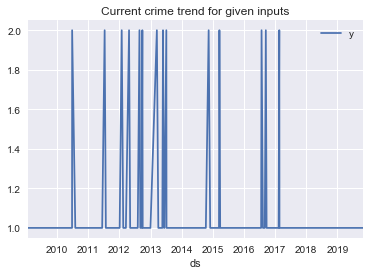

NameError: name 'Prophet' is not defined

In [76]:
#Example of using the above function to predict the crime trend of ARSON in police district 5.0
predictCrimeTrend(5.0,'ARSON')

Let us plot the predictions for 23 different districts for 10 violent and non-violent crime types that can be utilized by the police in each of the above district.

In [ ]:
policeDistricts=chicago['District'].unique()
crimeTypes=['THEFT', 'NARCOTICS', 'ASSAULT', 'PROSTITUTION', 'CRIM SEXUAL ASSAULT', 
          'HOMICIDE', 'ARSON', 'GAMBLING',  'KIDNAPPING', 'STALKING',]
for i in policeDistricts:
    print("Different crime trends in police district : ",i)
    for j in crimeTypes:
        predictCrimeTrend(i,j)